# Final CI notebook

In [1]:
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
pd.options.display.max_rows = 10
pd.options.display.notebook_repr_html = True
pd.options.display.max_columns = None

In [2]:
pd.options.display.max_rows = None
pd.options.display.notebook_repr_html = True
pd.options.display.max_columns = None

### The locations of lexicons and the dataset - - need to be changed for you to run locally

In [3]:
dataLoc = '/Users/gautamborgohain/Desktop/Tweets_labeled_325.xlsx'
subjLexLoc = '/Users/gautamborgohain/PycharmProjects/Twitter_target_dependent_SA/subjectivity.csv'
HL_posLoc = '/Users/gautamborgohain/PycharmProjects/DT_Labs/PLayground/Gautam_Borg/HuLiuLexicon/positive-words.txt'
HL_negLoc = '/Users/gautamborgohain/PycharmProjects/DT_Labs/PLayground/Gautam_Borg/HuLiuLexicon/negative-words.txt'

In [4]:
data_unlab = pd.read_excel(dataLoc)

# Explorotative analysis

<IPython.core.display.Javascript object>


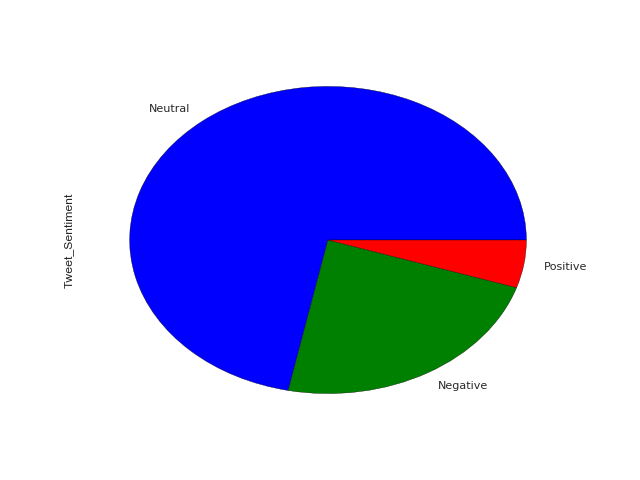

In [116]:
data_unlab['Tweet_Sentiment'] = 1
data_unlab.Tweet_Sentiment[data_unlab.Sentiment_2 == 1] = 'Positive'
data_unlab.Tweet_Sentiment[data_unlab.Sentiment_2 == 0] = 'Neutral'
data_unlab.Tweet_Sentiment[data_unlab.Sentiment_2 == -1] = 'Negative'
data_unlab.Tweet_Sentiment.value_counts().plot(kind = 'pie')


<IPython.core.display.Javascript object>


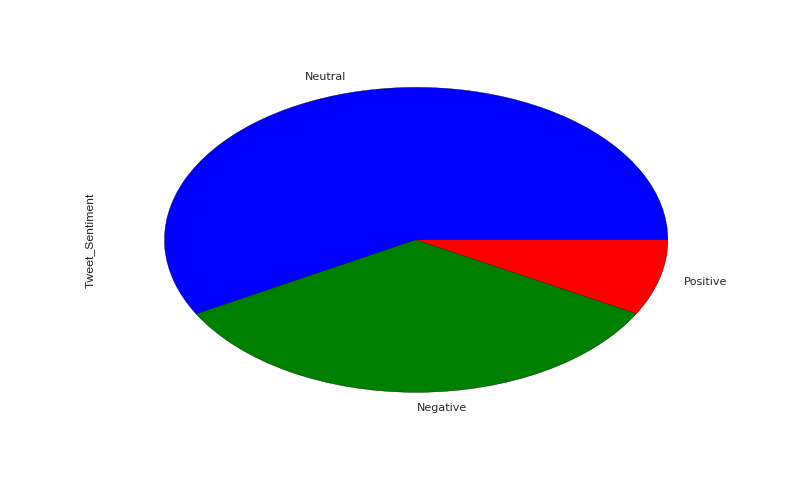

In [242]:
%matplotlib notebook

newdf['Tweet_Sentiment'] = 1
newdf.Tweet_Sentiment[newdf.Sentiment_2 == 1] = 'Positive'
newdf.Tweet_Sentiment[newdf.Sentiment_2 == 0] = 'Neutral'
newdf.Tweet_Sentiment[newdf.Sentiment_2 == -1] = 'Negative'

newdf.Tweet_Sentiment.value_counts().plot(kind = 'pie')

<IPython.core.display.Javascript object>


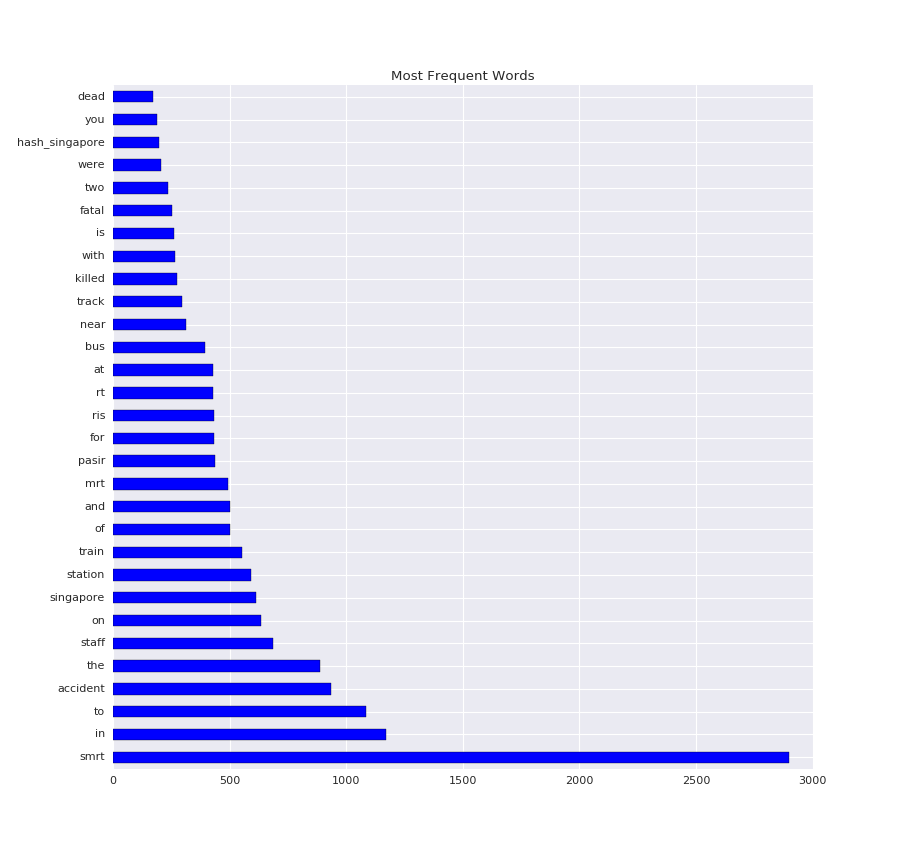

In [113]:
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib notebook

vectorizer = CountVectorizer(ngram_range=(1,1))
documentmatrix = vectorizer.fit_transform(data_unlab_copy['Tweet']).toarray()
columns = vectorizer.get_feature_names()
vectordf = pd.DataFrame(data=documentmatrix, columns=columns)
words = vectordf.sum(axis = 0)
words.sort_values(ascending=False)[:30].plot(kind = 'barh',title = 'Most Frequent Words',figsize = (10,10),fontsize = 10)

<IPython.core.display.Javascript object>


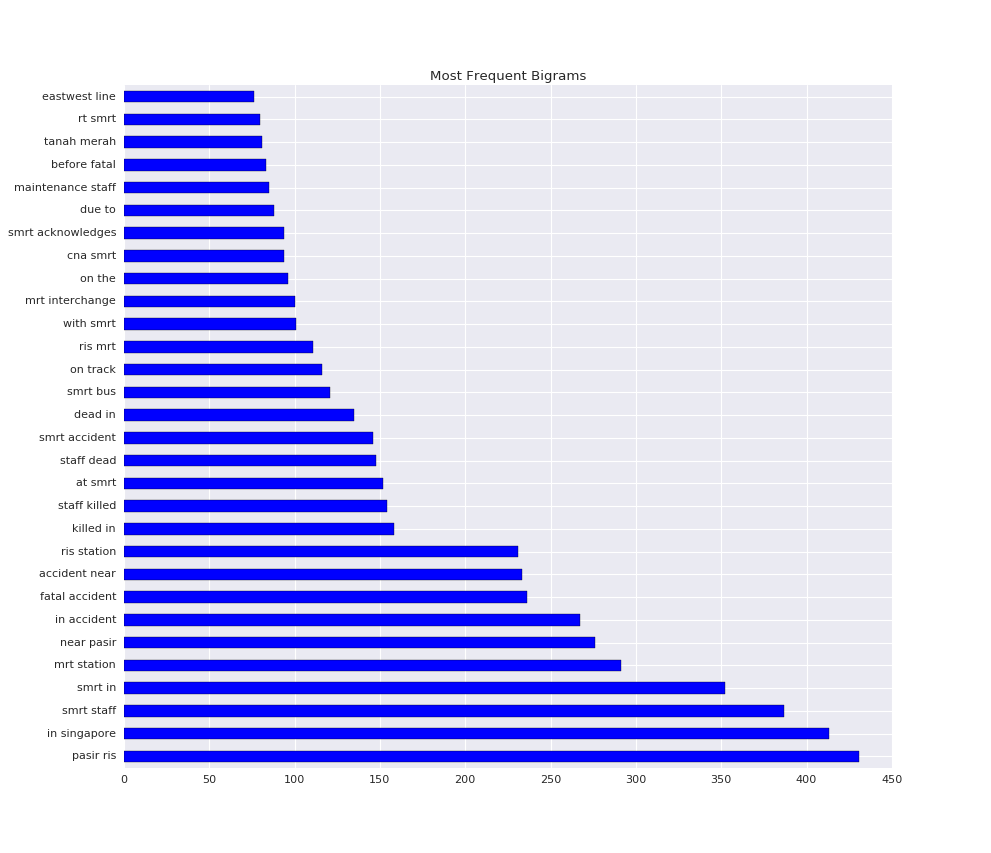

In [115]:
%matplotlib notebook

vectorizer = CountVectorizer(ngram_range=(2,2))
documentmatrix = vectorizer.fit_transform(data_unlab_copy['Tweet']).toarray()
columns = vectorizer.get_feature_names()
vectordf = pd.DataFrame(data=documentmatrix, columns=columns)
words = vectordf.sum(axis = 0)
words.sort_values(ascending=False)[:30].plot(kind = 'barh',title = 'Most Frequent Bigrams',figsize = (10,10),fontsize = 10)

In [128]:
tempdata = data_unlab[ (data_unlab['Created At'] > '02/01/2016') & (data_unlab['Created At'] < '03/01/2016')]
len(tempdata)

554

<IPython.core.display.Javascript object>


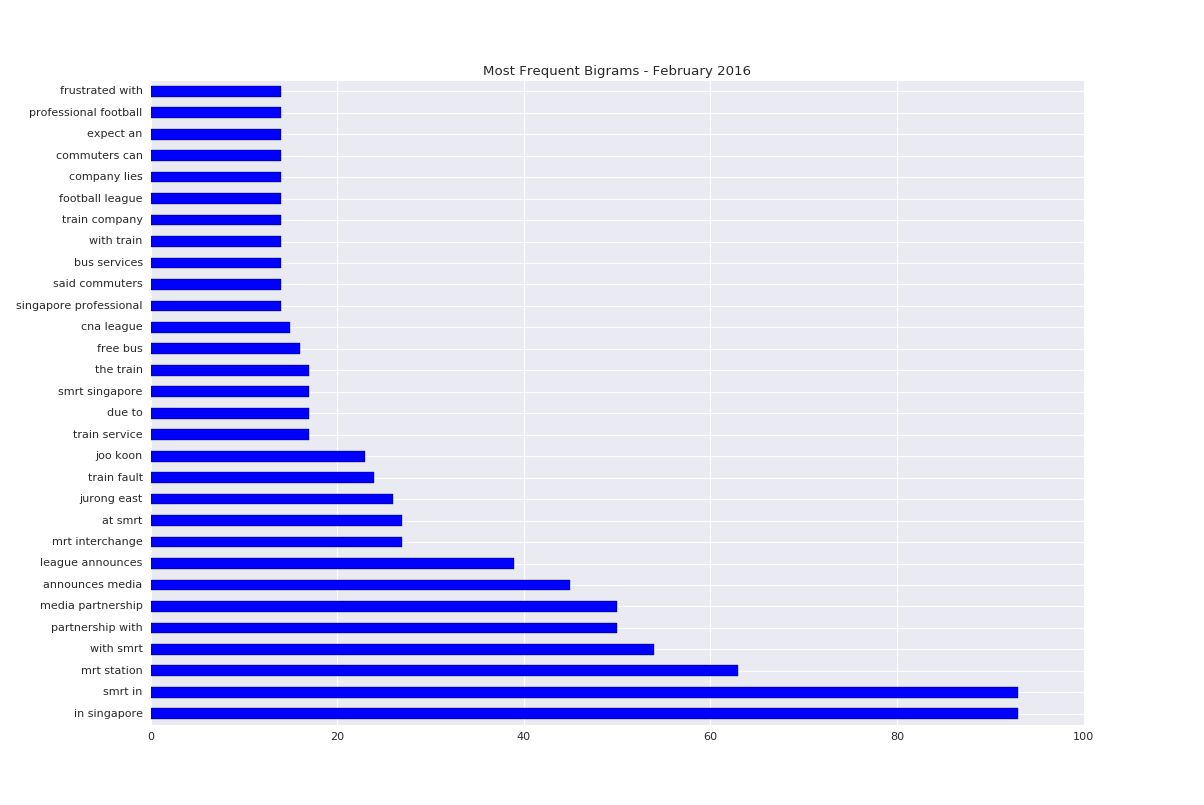

In [136]:
%matplotlib notebook

tempdata = data_unlab_copy[ (data_unlab_copy['Created At'] >= '02/01/2016') & (data_unlab_copy['Created At'] < '03/01/2016')]

vectorizer = CountVectorizer(ngram_range=(2,2))
documentmatrix = vectorizer.fit_transform(tempdata['Tweet']).toarray()
columns = vectorizer.get_feature_names()
vectordf = pd.DataFrame(data=documentmatrix, columns=columns)
words = vectordf.sum(axis = 0)
words.sort_values(ascending=False)[:30].plot(kind = 'barh',title = 'Most Frequent Bigrams - February 2016',figsize = (10,10),fontsize = 10)

<IPython.core.display.Javascript object>


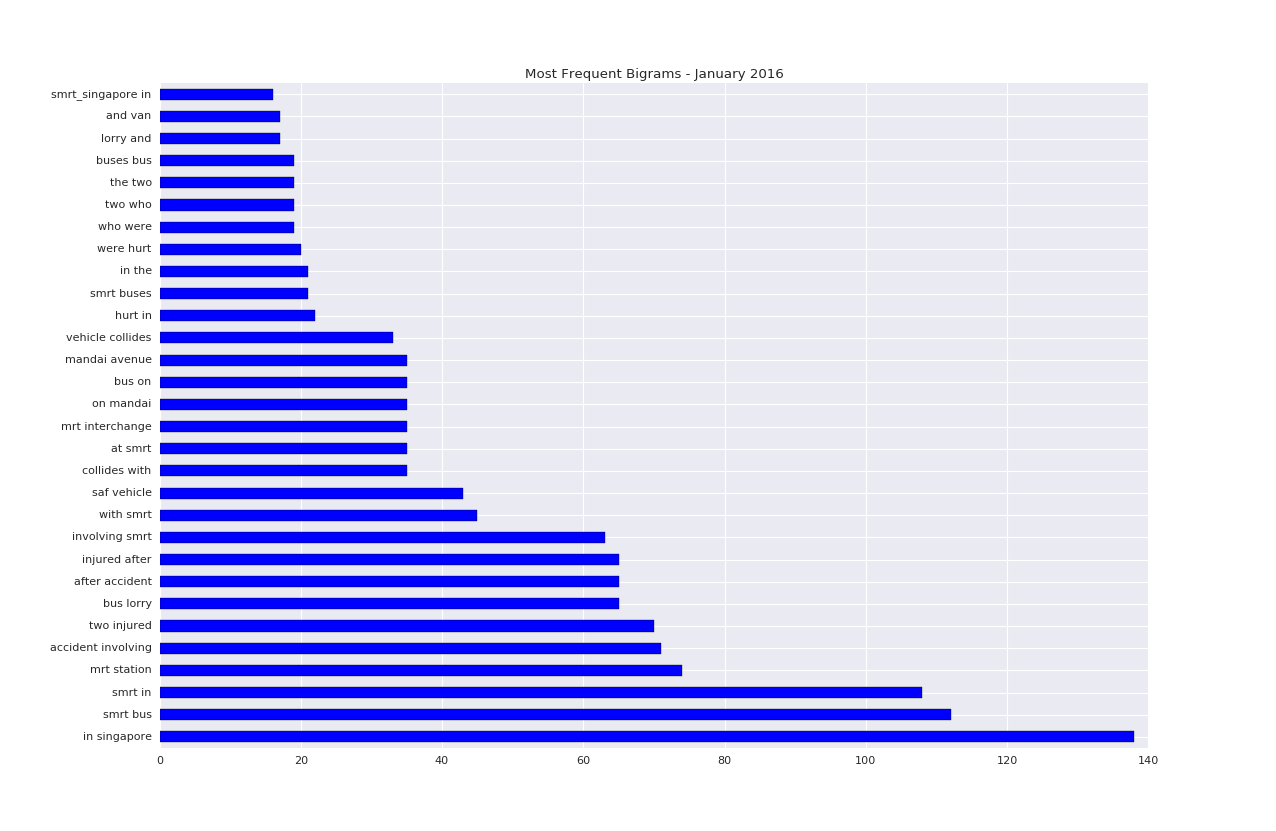

In [137]:
%matplotlib notebook

tempdata = data_unlab_copy[ (data_unlab_copy['Created At'] >= '01/01/2016') & (data_unlab_copy['Created At'] < '02/01/2016')]

vectorizer = CountVectorizer(ngram_range=(2,2))
documentmatrix = vectorizer.fit_transform(tempdata['Tweet']).toarray()
columns = vectorizer.get_feature_names()
vectordf = pd.DataFrame(data=documentmatrix, columns=columns)
words = vectordf.sum(axis = 0)
words.sort_values(ascending=False)[:30].plot(kind = 'barh',title = 'Most Frequent Bigrams - January 2016',figsize = (10,10),fontsize = 10)

<IPython.core.display.Javascript object>


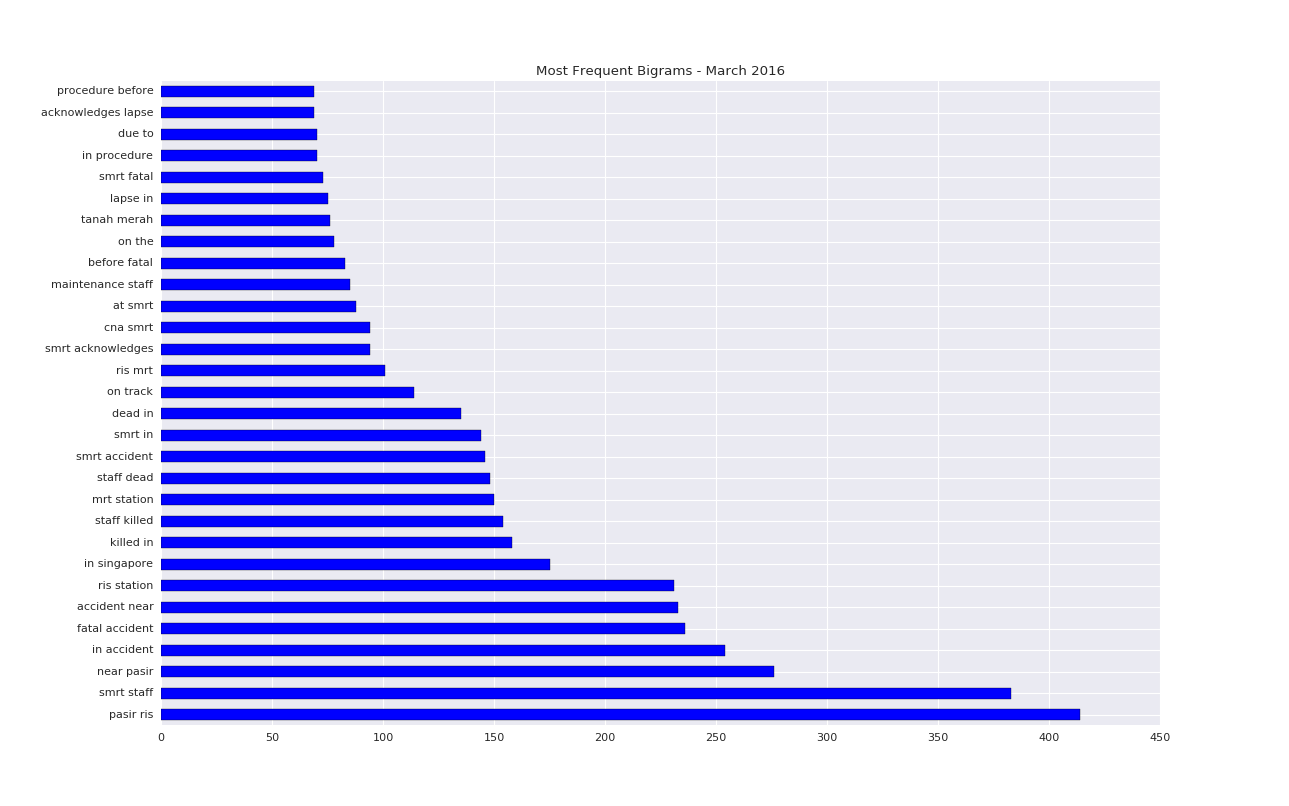

In [138]:
%matplotlib notebook

tempdata = data_unlab_copy[(data_unlab_copy['Created At'] >= '03/01/2016') & (data_unlab_copy['Created At'] < '04/01/2016')]

vectorizer = CountVectorizer(ngram_range=(2,2))
documentmatrix = vectorizer.fit_transform(tempdata['Tweet']).toarray()
columns = vectorizer.get_feature_names()
vectordf = pd.DataFrame(data=documentmatrix, columns=columns)
words = vectordf.sum(axis = 0)
words.sort_values(ascending=False)[:30].plot(kind = 'barh',title = 'Most Frequent Bigrams - March 2016',figsize = (10,10),fontsize = 10)

<IPython.core.display.Javascript object>


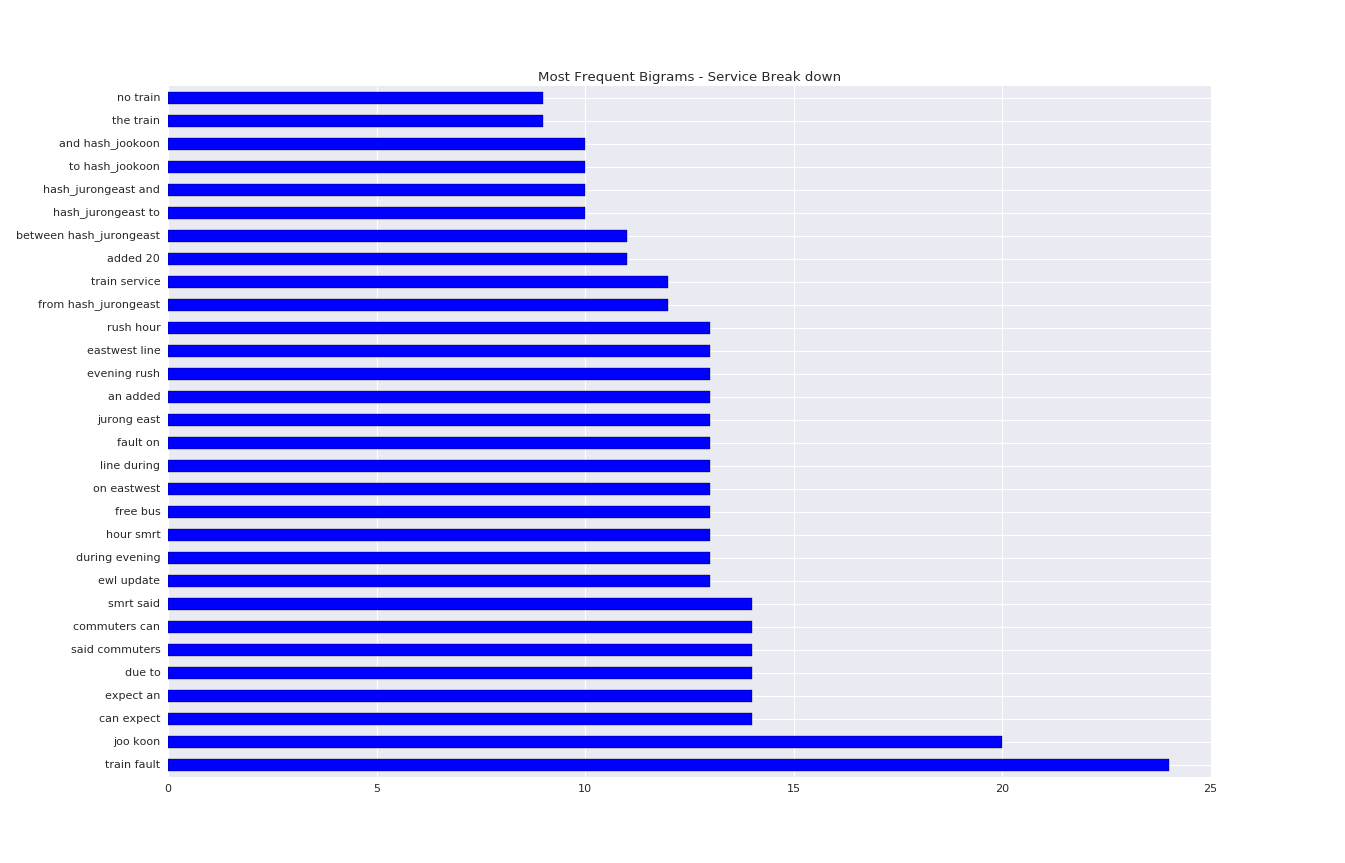

In [191]:
%matplotlib notebook

tempdata = data_unlab_copy[(data_unlab_copy['Created At'] >= '2016-02-19') & (data_unlab_copy['Created At'] < '2016-02-20')]

vectorizer = CountVectorizer(ngram_range=(2,2))
documentmatrix = vectorizer.fit_transform(tempdata['Tweet']).toarray()
columns = vectorizer.get_feature_names()
vectordf = pd.DataFrame(data=documentmatrix, columns=columns)
words = vectordf.sum(axis = 0)
words.sort_values(ascending=False)[:30].plot(kind = 'barh',title = 'Most Frequent Bigrams - Service Break down',figsize = (10,10),fontsize = 10)

<IPython.core.display.Javascript object>


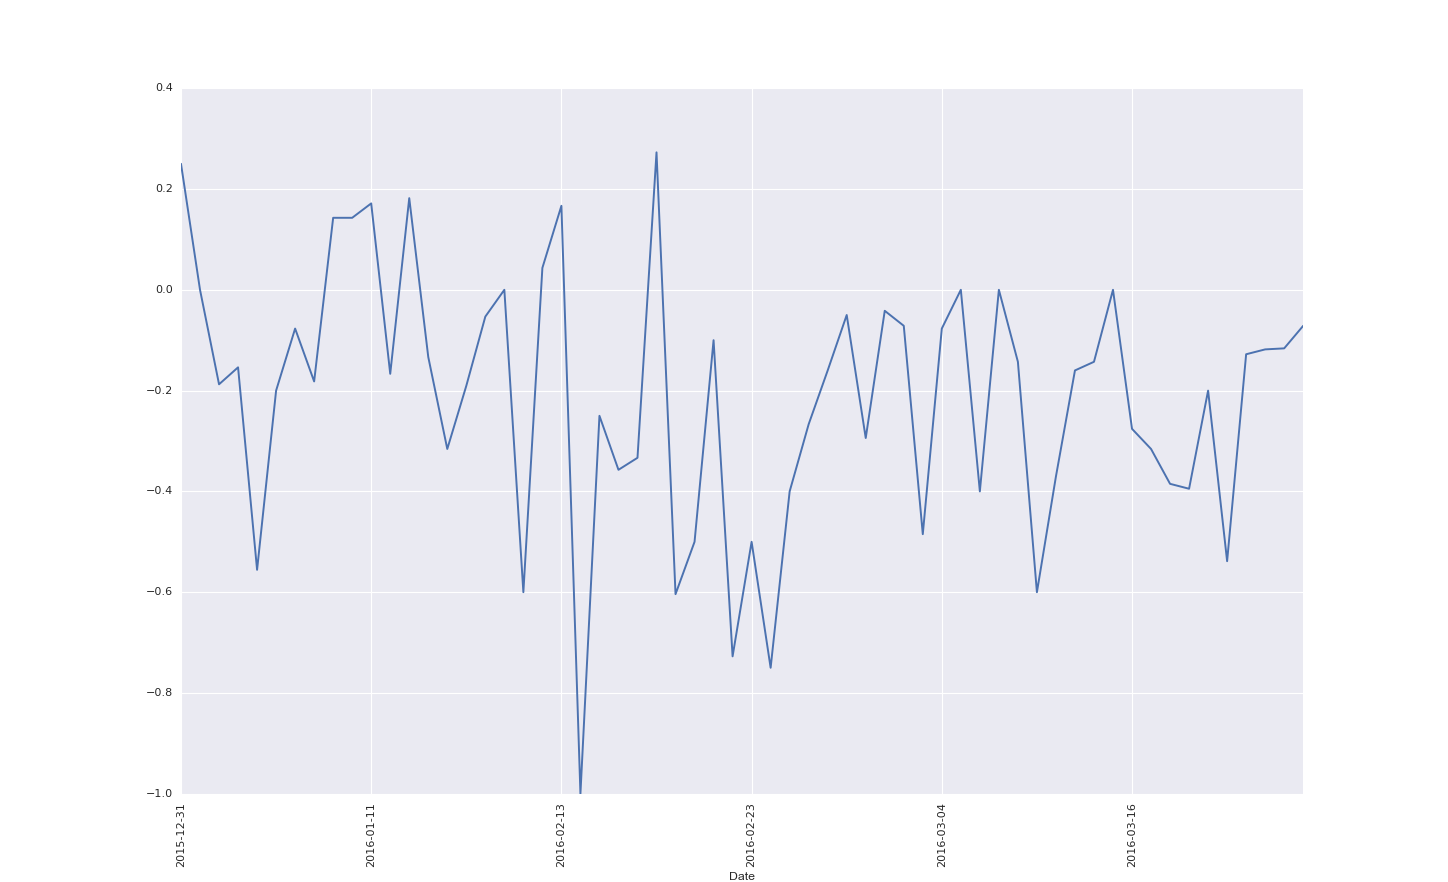

[None, None, None, None, None, None, None]

In [171]:
%matplotlib notebook
tempdata = data_unlab_copy.copy()
tempdata['Date'] = tempdata['Created At'].map(lambda x: x.strftime('%Y-%m-%d'))    
tempdata = tempdata.groupby(['Date'])['Sentiment_2'].mean()
tempdata.plot(kind = 'line', x = 'Date', y= 'Sentiment_2')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.setp(labels, rotation=90)

<IPython.core.display.Javascript object>


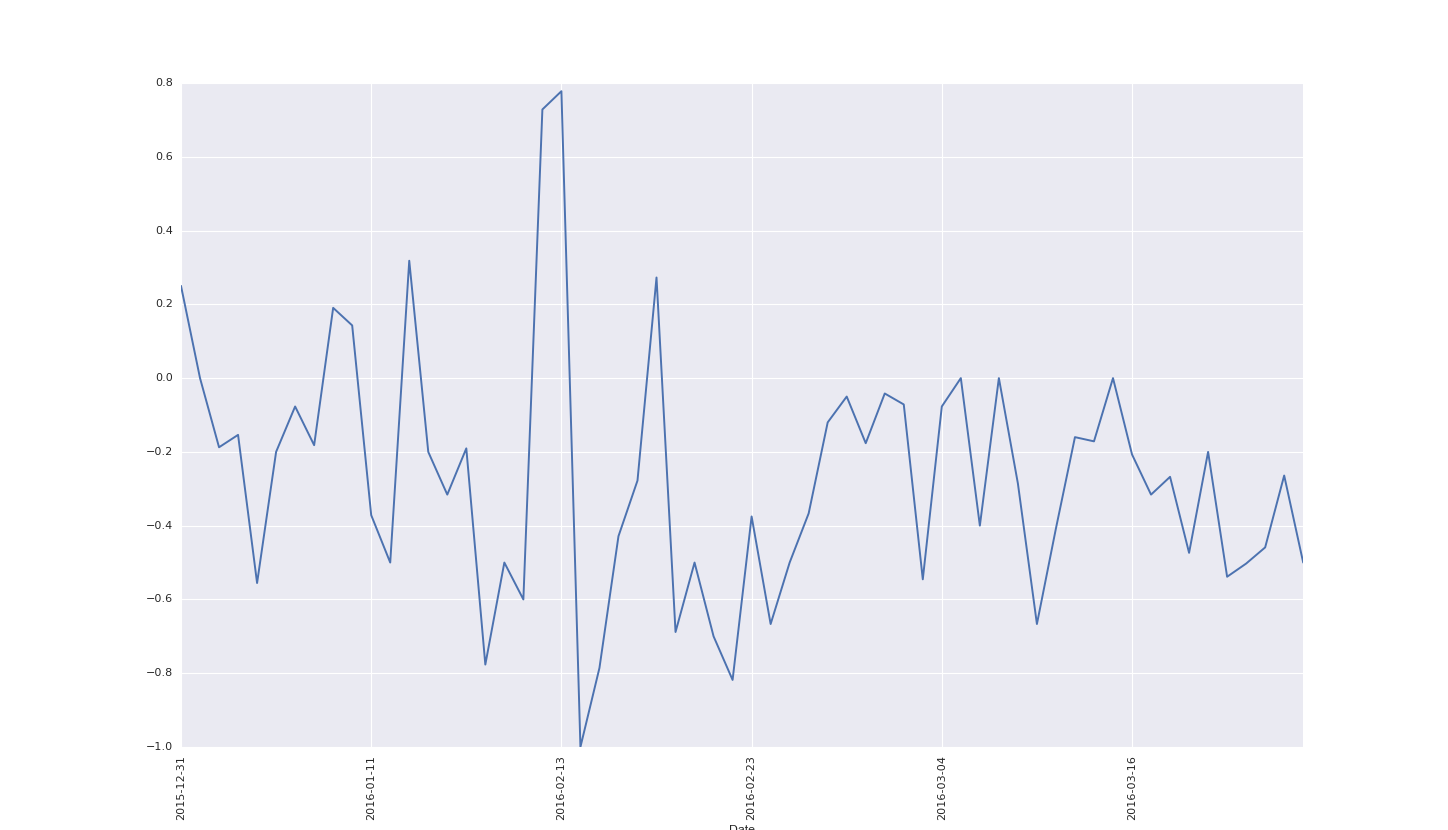

[None, None, None, None, None, None, None]

In [172]:
# Time series on the other labelled data

tempdata = data_unlab_copy.copy()
tempdata['Date'] = tempdata['Created At'].map(lambda x: x.strftime('%Y-%m-%d'))    
tempdata = tempdata.groupby(['Date'])['Sentiment'].mean()
tempdata.plot(kind = 'line', x = 'Date', y= 'Sentiment')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.setp(labels, rotation=90)

In [194]:
%matplotlib inline

In [5]:
import re
def regexStuff(tweet):
    tweet = re.sub(r'@SMRT_singapore|@smrt_singapore|@smrt|@SMRT_Singapore','SMRT,',tweet)
    tweet = re.sub(r'@[^ ]*','',tweet)
#     tweet = re.sub(r'@','AT_',tweet)
    #Clear the http and other characters that are causing problems
    tweet = re.sub('RT @', '', tweet)
#     tweet = re.sub('ST \||CNA \||TODAY \||COCONUTS \||ASIAONE \||TNP \||REDWIRE TIMES \||', '', tweet)
    tweet = re.sub('((www\.[^ ]+)|(https?://[^ ]+))', 'URL', tweet)
    tweet = re.sub(r'http?[^ ]+','',tweet)
    tweet = re.sub(r'[\n]','',tweet)
    tweet = re.sub('[\.]+', '.', tweet)
    tweet = re.sub('…|\|','',tweet)
    tweet = re.sub('[-—]','',tweet)
    tweet = re.sub(r'&gt;|&amp;|&lt;','',tweet)
    tweet = re.sub('[\s]+', ' ', tweet)
    #Substitue common shorthands with the appropriate words for POS tagging and type dependecy to work
    tweet = re.sub(r' u ',' you ',tweet)
    tweet = re.sub(r' n ',' no ',tweet)
    tweet = re.sub(r' y ',' why ',tweet)
    tweet = re.sub(r' nt ',' not ',tweet)
    tweet = re.sub(r' dwn ',' down ',tweet)
    tweet = re.sub(r' frver ',' forever ',tweet)
    tweet = re.sub(r' bc ',' because ',tweet)
    tweet = re.sub(r' bcoz ',' because ',tweet)
    tweet = re.sub(r' cuz ',' because ',tweet)
    tweet = re.sub(r' im ',' I am ',tweet)
    tweet = re.sub(r' zzz ',' sleep ',tweet)
    tweet = re.sub(r' y\'all ',' you all ',tweet)
    #Set the hash tags
    tweet = re.sub(r'#','HASH_',tweet)
    return tweet


poshand = open(HL_posLoc)
neghand = open(HL_negLoc)
poslist = []
neglist = []
for line in poshand:
    poslist.append(re.sub(r'\n','',line))
for line in neghand:
    neglist.append(re.sub(r'\n','',line))
print(len(poslist),len(neglist))

poshand.close()
neghand.close()

2006 4783


In [6]:
targets = ['SMRT','smrt','smrt_singapore','SMRT_SINGAPORE','train','mrt','TARGET','people','LRT','lrt','train']

## The functions that will be doing all the processing

In [102]:
'''
Stanford Core NLP dependency tree features
cd stanford-corenlp-full-2015-12-09/
export CLASSPATH="find . -name '*.jar'"
java -mx4g -cp "*" edu.stanford.nlp.pipeline.StanfordCoreNLPServer
'''

from pycorenlp import StanfordCoreNLP
nlp = StanfordCoreNLP('http://localhost:9000')
def getFeatureDF(feature_list):
    vectorizer = CountVectorizer()
    docmatrix = vectorizer.fit_transform(feature_list).toarray()
    columns = vectorizer.get_feature_names()
    columns = [word.upper() for word in columns]  # uppercasing to avoid conflict of in and other words
    df = pd.DataFrame(data=docmatrix, columns=columns)
    return df
from sklearn.feature_extraction.text import CountVectorizer

def getBOWFeatures(frame,n_min,n_max):
    vectorizer = CountVectorizer(min_df=4,max_df = 500,stop_words='english',lowercase=True,ngram_range=(n_min,n_max))
    documentmatrix = vectorizer.fit_transform(frame['Tweet']).toarray()
    columns = vectorizer.get_feature_names()
    bowdf = pd.DataFrame(data=documentmatrix, columns=columns)
    print(len(bowdf.columns))
    return(bowdf)

def posorneg(word):
    if(len(poslist)>0 and len(neglist)>0):
        word = word.lower()
        if word in poslist:
            return 'POSITIVE'
        elif word in neglist:
            return 'NEGATIVE'
        else: return word
        

verbs = ['VBG','VB','VBD','VBN','VBP','VBZ']
adjnon = ['JJ','JJR','JJS','NN','NNS','NNP','NNPS']
objects = ['obj','pobj','dobj','iobj','nmod']
adverbs = ['RB','RBR','RBS']
subjs = ['nsubj','dep']

#helper functions
def getDependentGloss(dep,word, depToSearch):
    return dep.get('dependentGloss') if dep.get('governorGloss') == word and dep.get('dep') in depToSearch else ''

def getDependentGloss_WithTargets(dep,word):
    return dep.get('dependentGloss') if dep.get('governorGloss') == word and dep.get('dependentGloss') in targets else ''

def isTransitive(verb,depdicts):
    for dep in depdicts:
        if dep.get('governorGloss')  == verb and dep.get('dep') in objects:
            return True        
    return False

# tweet = 'I love iPhone'
# tweet = 'SMRT broke down again. Great!'
# tweet = 'SMRT works better with the Cell- Band'

def getTypeDependencyFeatures(frame):
    dependecyfeatures = []
    for tweet in frame['Tweet']:
        tweet = tweet.encode('utf-8')
        output = nlp.annotate(tweet, properties={
                'annotators': 'parse,relation',
                'outputFormat': 'json'
            })

        features = []
        for i in range(len(output['sentences'])):
            posdicts = output['sentences'][i]['tokens']
            depdicts = output['sentences'][i]['basic-dependencies']
            count = 0
            for pos in posdicts:
                verb = pos.get('word') if pos.get('pos') in verbs else '' # Get Verbs
                if verb != '':
                    if(isTransitive(verb, depdicts)):
                        for dep in depdicts:                  
                            #Rule 1
                            dependent = getDependentGloss(dep,verb,objects)
                            if dependent != '' and dependent in targets:
                                features.append(posorneg(verb)+'_arg2')
                            #Rule 2
                            dependent = getDependentGloss(dep,verb,subjs)
                            if (dependent != '' and dependent in targets):
                                features.append(posorneg(verb)+'_arg1')
                    else:
                        #Rule 3
                        for dep in depdicts:
                            dependent = getDependentGloss(dep,verb,subjs)
                            if dependent != '' and dependent in targets:
                                features.append(posorneg(verb)+'_it_arg1')
                #Rule 4            
                adj_noun = pos.get('word') if pos.get('pos') in adjnon else '' # Get Adjectives and Nouns
                if adj_noun != '':
                    for dep in depdicts:
                        dependent = getDependentGloss_WithTargets(dep,adj_noun)
                        if dependent != '':features.append(posorneg(adj_noun)+'_arg1')
                #Rule 7
                adv = pos.get('word') if pos.get('pos') in adverbs else ''
                if adv != '':    
                    for dep in depdicts:
                        verb = dep.get('governorGloss') if dep.get('dependentGloss') == adv else ''# Get the verb it modifies
                        if verb != '':
                            for dep1 in depdicts:#Loop again and check the target
                                dependent = getDependentGloss_WithTargets(dep1,verb)
                                if dependent != '':
                                    # Rule 8 - negation 
                                    if dep.get('dep') == 'neg':
                                        features.append('arg1_v_neg_'+posorneg(verb))
                                    else:
                                        features.append('arg1_v_'+posorneg(adv))
            #Rule 5
            for dep in depdicts:
                dependent = dep.get('dependentGloss') if i>0 and dep.get('governorGloss') =='ROOT' and len(features)>0 else ''
                if dependent != '' : 
                    for pos in posdicts:
                        if pos.get('word') == dependent and pos.get('pos') in adjnon:
                            features.append(posorneg(dependent)+'_arg')
                # If in the second sentence,for the root, theres is already a target dependent feature in the list 
                #  suggesting that that target appears in the previous snentence  and it is an adjective or noun
                
            
        dependecyfeatures.append(' '.join(features))
    
    isListEmpty = True
    for data in dependecyfeatures:
        if (data != ''):
            isListEmpty = False

    if(not isListEmpty):
        df = getFeatureDF(dependecyfeatures)
        print('Completed Type Dependency Analysis')
        return df

    else:
         return "No Type Dependency data found"

        
        
        
def getTypeDependencyFeaturesNoPol(frame):
    dependecyfeatures = []
    for tweet in frame['Tweet']:
        tweet = tweet.encode('utf-8')
        output = nlp.annotate(tweet, properties={
                'annotators': 'parse,relation',
                'outputFormat': 'json'
            })

        features = []
        for i in range(len(output['sentences'])):
            posdicts = output['sentences'][i]['tokens']
            depdicts = output['sentences'][i]['basic-dependencies']
            count = 0
            for pos in posdicts:
                verb = pos.get('word') if pos.get('pos') in verbs else '' # Get Verbs
                if verb != '':
                    if(isTransitive(verb, depdicts)):
                        for dep in depdicts:                  
                            #Rule 1
                            dependent = getDependentGloss(dep,verb,objects)
                            if dependent != '' and dependent in targets:
                                features.append((verb)+'_arg2')
                            #Rule 2
                            dependent = getDependentGloss(dep,verb,subjs)
                            if (dependent != '' and dependent in targets):
                                features.append((verb)+'_arg1')
                    else:
                        #Rule 3
                        for dep in depdicts:
                            dependent = getDependentGloss(dep,verb,subjs)
                            if dependent != '' and dependent in targets:
                                features.append((verb)+'_it_arg1')
                #Rule 4            
                adj_noun = pos.get('word') if pos.get('pos') in adjnon else '' # Get Adjectives and Nouns
                if adj_noun != '':
                    for dep in depdicts:
                        dependent = getDependentGloss_WithTargets(dep,adj_noun)
                        if dependent != '':features.append((adj_noun)+'_arg1')
                #Rule 7
                adv = pos.get('word') if pos.get('pos') in adverbs else ''
                if adv != '':    
                    for dep in depdicts:
                        verb = dep.get('governorGloss') if dep.get('dependentGloss') == adv else ''# Get the verb it modifies
                        if verb != '':
                            for dep1 in depdicts:#Loop again and check the target
                                dependent = getDependentGloss_WithTargets(dep1,verb)
                                if dependent != '':
                                    # Rule 8 - negation 
                                    if dep.get('dep') == 'neg':
                                        features.append('arg1_v_neg_'+(verb))
                                    else:
                                        features.append('arg1_v_'+(adv))
            #Rule 5
            for dep in depdicts:
                dependent = dep.get('dependentGloss') if i>0 and dep.get('governorGloss') =='ROOT' and len(features)>0 else ''
                if dependent != '' : 
                    for pos in posdicts:
                        if pos.get('word') == dependent and pos.get('pos') in adjnon:
                            features.append((dependent)+'_arg')
                # If in the second sentence,for the root, theres is already a target dependent feature in the list 
                #  suggesting that that target appears in the previous snentence  and it is an adjective or noun
                
            
        dependecyfeatures.append(' '.join(features))
    
    isListEmpty = True
    for data in dependecyfeatures:
        if (data != ''):
            isListEmpty = False

    if(not isListEmpty):
        df = getFeatureDF(dependecyfeatures)
        print('Completed Type Dependency Analysis3')
        return df

    else:
         return "No Type Dependency data found"

        
from nltk import pos_tag
from nltk import word_tokenize

def getPOStagfeatures(frame):
    tagsoftweet = []
    reg = re.compile(r'at_user|rt|TARGET,')
    count = 1
    for tweet in frame['Tweet']:
        tweet = re.sub(reg, '', tweet)  # stripping it off stuff
#         print('POS Tagging tweet', count)
        postaggedtweet = pos_tag(word_tokenize(tweet))  # this one is pos atgged..list inside list : token[1] for tag
        tags = []
        for token in postaggedtweet:
            tags.append(token[1])
        tagsoftweet.append(' '.join(tags))
        count += 1
    df = getFeatureDF(tagsoftweet)
    print('Completed POS tagging')
    return df

def cleantweet(tweet):
    tweet = re.sub('url|at_user|rt|\.', '', tweet)  ## removing these from the tweets
    return tweet

def getSubjectvityfeatures(frame):

    lexicon = pd.read_csv(subjLexLoc)
    tweet_tags = []
    count_tweet = 1
    for tweet in frame['Tweet']:
        tweet = cleantweet(tweet)
        typeList = []
        priorpolarityList = []
        count_word = 0  # this counter is for the pos tagging. traces the words in the tweet so that the idrect index of the tag can be accesses
#         print('Performing subjectivity analysis of Tweet ', count_tweet)
        count_tweet += 1
        for word in word_tokenize(tweet):
            result = lexicon[lexicon.word1 == word]
            if len(result) != 0:  # word is there in the lexicon
                if len(result) == 1:  # this case is handling the ones where the there is only one record of the word
                    typeList.append(result.iloc[0][0])
                    priorpolarityList.append(result.iloc[0][5])
                if len(result) > 1:  # this is if there are more than one instances of the word in the lexicon then the pos tag is checked
#                     print('Have to tag POS, Hold On!')
                    poslist = pos_tag(word_tokenize(tweet))#Tag the tweet
                    postag = poslist[count_word][1]#Using the position of the word, find the POS tag
                    if postag in ['NN', 'NNP', 'NNS',
                                  'NNPS']:  # make the POS tags to the format used by the MPQA lexicon
                        postag = 'noun'
                    elif postag in ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']:
                        postag = 'verb'
                    elif postag in ['RB', 'RBR', 'RBS']:
                        postag = 'adverb'
                    elif postag in ['JJ', 'JJR', 'JJS']:
                        postag = 'adj'
                    second_result = result[result.pos1 == postag]#get the word-postag combination from the lexicon
                    if len(second_result) != 0:  # this is to check if the pos tag that the word was tagged is there in the lexicon for that word
                        typeList.append(second_result.iloc[0][0])
                        priorpolarityList.append(second_result.iloc[0][5])

            count_word += 1

        tweet_tags.append(' '.join(typeList) + ' ' + ' '.join(priorpolarityList))

    isListEmpty = True
    for data in tweet_tags:
        if (data != " "):
            isListEmpty = False

    if(not isListEmpty):
        df = getFeatureDF(tweet_tags)
        print('Completed Subjective Analysis')
        return df

    else:
         return "No Subjectivity data found"
        
def getPositiveWordCount(tweet):
    countPos = 0
    for word in word_tokenize(tweet):
        if len(word)>=2 and word in poslist: countPos+=1
    return countPos

def getNegativeWordCount(tweet):
    countNeg = 0
    for word in word_tokenize(tweet):
        if len(word)>=2 and word in neglist: countNeg+=1
    return countNeg

from nltk import pos_tag
from nltk import word_tokenize
from nltk.stem.porter import *
stemmer = PorterStemmer()

adjvb = ['VBG','VB','VBD','VBN','VBP','VBZ','JJ','JJR','JJS']
def posorneg(word):
    if(len(poslist)>0 and len(neglist)>0):
        word = word.lower()
        sword = stemmer.stem(word)
        if word in poslist or sword in poslist:
            return 'POSITIVE'
        elif word in neglist or sword in neglist:
            return 'NEGATIVE'
        else: return word

def findTargetBack(basic_dep,ind):
    relatedWords =[]
    relatedWords.append(basic_dep[ind].get('dependentGloss'))
    relatedWords.append(basic_dep[ind].get('governorGloss'))
    for i in range(ind-1,0,-1):
        if basic_dep[i].get('dep') != 'compound':
            continue;
        else:
            if basic_dep[i].get('dependentGloss') in targets and basic_dep[i].get('governorGloss') in relatedWords:
                return basic_dep[i].get('dependentGloss')
    return basic_dep[ind].get('dependentGloss')

def findTargetFor(basic_dep,ind):
    relatedWords =[]
    relatedWords.append(basic_dep[ind].get('dependentGloss'))
    relatedWords.append(basic_dep[ind].get('governorGloss'))
    for i in range(ind+1,len(basic_dep)):
        if (basic_dep[i].get('dependentGloss') in targets and basic_dep[i].get('governorGloss') in relatedWords):
            return basic_dep[i].get('dependentGloss')
        elif (basic_dep[i].get('governorGloss') in targets and basic_dep[i].get('dependentGloss') in relatedWords):
            return basic_dep[i].get('governorGloss')
        
    return basic_dep[ind].get('dependentGloss')

def getPOS(pos_dict,word):
    for pos in pos_dict:
        if pos.get('word') == word:
            return pos.get('pos')


def soaTypeDependency(frame):
    dependecyfeatures = []
    for tweet in frame['Tweet']:
#         tweet = tweet.split(':')[1] if re.search(':', tweet) else  tweet
        tweet = tweet.encode('utf-8')
        output = nlp.annotate(tweet, properties={
            'annotators': 'parse,relation',
            'outputFormat': 'json'
        })
        features = []
        try:
            basic_dep = output['sentences'][0]['basic-dependencies']
            pos = output['sentences'][0]['tokens']

            mods2 = ['amod','dep','nsubj']
            for i in range(0,len(basic_dep)):
                if basic_dep[i].get('dep')in mods2:
                    targA = findTargetFor(basic_dep,i)
                    targB = findTargetBack(basic_dep,i)

                    word = targB if targB in targets else basic_dep[i].get('dependentGloss')
                    word = targA if targA in targets else basic_dep[i].get('dependentGloss')
                    governor = basic_dep[i].get('governorGloss')
                    dependent = basic_dep[i].get('dependentGloss')
                    if(getPOS(pos,governor) in ['VBG','VB','VBD','VBN','VBP','VBZ','NN','NNS','NNP','NNPS']):
                        if(word in targets):
                            features.append(str(posorneg(governor)) + str("_") + str("TARGET"))
                            if(getPOS(pos,dependent) in adjvb):
                                features.append(str(posorneg(dependent)) + str("_") + str("TARGET"))
                        else:
                            features.append(str(posorneg(governor)) + str("_") + str("OTHER"))
                            if(getPOS(pos,dependent) in adjvb):
                                features.append(str(posorneg(dependent)) + str("_") + str("OTHER"))
        except:
            print(tweet)
        dependecyfeatures.append(' '.join(features))  
        
    isListEmpty = True
    for data in dependecyfeatures:
        if (data != ''):
            isListEmpty = False

    if(not isListEmpty):
        df = getFeatureDF(dependecyfeatures)
        print('Completed Type Dependency Analysis2')
        return df

    else:
         return "No Type Dependency data found"
        
        
def soaTypeDependency2(frame):
    dependecyfeatures = []
    for tweet in frame['Tweet']:
#         tweet = tweet.split(':')[1] if re.search(':', tweet) else  tweet
        tweet = tweet.encode('utf-8')
        output = nlp.annotate(tweet, properties={
            'annotators': 'parse,relation',
            'outputFormat': 'json'
        })
        features = []
        try:
            basic_dep = output['sentences'][0]['basic-dependencies']
            pos = output['sentences'][0]['tokens']

            mods2 = ['amod','dep','nsubj']
            for i in range(0,len(basic_dep)):
                if basic_dep[i].get('dep')in mods2:
                    targA = findTargetFor(basic_dep,i)
                    targB = findTargetBack(basic_dep,i)

                    word = targB if targB in targets else basic_dep[i].get('dependentGloss')
                    word = targA if targA in targets else basic_dep[i].get('dependentGloss')
                    
                    governor = basic_dep[i].get('governorGloss')
                    dependent = basic_dep[i].get('dependentGloss')
                    if(getPOS(pos,governor) in ['VBG','VB','VBD','VBN','VBP','VBZ','NN','NNS','NNP','NNPS']):
                        if(word in targets):
                            features.append(str(posorneg(governor)) + str("_") + str("TARGET"))
                            if(getPOS(pos,dependent) in adjvb):
                                features.append(str(posorneg(dependent)) + str("_") + str("TARGET"))
        except:
            print(tweet)
        dependecyfeatures.append(' '.join(features))  
        
    isListEmpty = True
    for data in dependecyfeatures:
        if (data != ''):
            isListEmpty = False

    if(not isListEmpty):
        df = getFeatureDF(dependecyfeatures)
        print('Completed Type Dependency Analysis2b')
        return df

    else:
         return "No Type Dependency data found"


        
adj = ['JJ','JJR','JJS']
verbs = ['VBG','VB','VBD','VBN','VBP','VBZ']
adv = ['RB','RBR','RBS']

def getDistanceCounts(frame):
    tweetsdists = []
    for tweet in frame['Tweet']:
        distances = []
        postags = pos_tag(word_tokenize(tweet))
        count = 0
        target = 0
        for key,val in postags:
            if key in targets:
                target = count
            count+=1

        count = 0
        adjloc = []
        verbloc = []
        advloc = []
        for key, val in postags:
            if val in adj:
                adjloc.append(count)
            if val in verbs:
                verbloc.append(count)
            if(val in adv):
                advloc.append(count)
            count +=1
        adjdist = [abs(target - loc) for loc in adjloc]
        if len(adjdist) >0:
            distances.append(min(adjdist))
        else:
            distances.append(0)
        verbdist = [abs(target - loc) for loc in verbloc]
        if len(verbdist) >0:
            distances.append(min(verbdist))
        else:
            distances.append(0)
        advdist = [abs(target - loc) for loc in advloc]
        if len(advdist) >0:
            distances.append(min(advdist))
        else:
            distances.append(0)
        tweetsdists.append(distances)
    return pd.DataFrame(tweetsdists, columns = ['ADJ_DIST','VERB_DIST','ADV_DIST'])


# keywords = ['SMRT','smrt','smrt_singapore','SMRT_SINGAPORE','train','mrt','TARGET','people','LRT','lrt']

def get_hastags(tweet):
    hash_tags = re.findall('HASH_([^ ]*)', tweet)
    return hash_tags

def getAdjectives(tweet):
    poslist = pos_tag(word_tokenize(tweet))
    adjectives = []
    for pos in poslist:
        if pos[1] in ['JJ', 'JJR', 'JJS']:
            adjectives.append(pos[0])
            
    return adjectives
            

def getTargetFeatures(frame):
    tweet_target_features = []
    for tweet in frame['Tweet']:
        tweet = cleantweet(tweet)
        tags = get_hastags(tweet)
#         keywords = ['SMRT', 'mrt','lrt','LRT', 'MRT', 'smrt', 'Singapore_MRT',"TARGET"]
        tokens = word_tokenize(tweet)  
        targets_feature = []
        for keyword in targets:
            if keyword in tags:  
                feature = keyword + '_hash'
                targets_feature.append(feature)
            if keyword in tokens:
                adjectives = getAdjectives(tweet)  # This will get all the adjectives, not just one
                features = []
                for adjective in adjectives:
                    adjective = re.sub('-', '_',
                                       adjective)  # this to take care of probelesm for - like east-west/ north-south.. now east_west
                    features.append(keyword + '_' + adjective)
                feature = ' '.join(features)
                targets_feature.append(feature)

        tweet_target_features.append(' '.join(targets_feature))
#     print('features:',tweet_target_features)

    isListEmpty = True
    for data in tweet_target_features:
        if (data != ''):
            isListEmpty = False

    if(not isListEmpty):
        df = getFeatureDF(tweet_target_features)
        print("Complete target features")
        return df
    else:
         return "No Target dependant data found"

        
def hashTagFeatures(frame):
    hash_tags_all = []
    for tweet in frame['Tweet']:
        hash_tags = get_hastags(tweet)
        if len(hash_tags) >0:
            hash_tags = ' '.join(hash_tags)
        else:
            hash_tags = ''
        hash_tags_all.append(hash_tags)
    
    isListEmpty = True
    for data in hash_tags_all:
        if (data != ''):
            isListEmpty = False

    if(not isListEmpty):
        df = getFeatureDF(hash_tags_all)
        print("Complete target features")
        return df
    else:
         return "No Target dependant data found"

## The two functions that will be used for the ROC and the Cross validation curves

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cross_validation
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.learning_curve import learning_curve


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 10)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    print("Cross validation scores : ", test_scores_mean)
    print("Cross validation scores : ", np.mean(test_scores_mean))
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_recall_curve, classification_report, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn import cross_validation

import matplotlib.pyplot as plt

    
def Classify(data,perc):
    classifier = LinearSVC()
    # Seperate data to training and test set
    training_set = data.sample(frac = perc, random_state=0)
    print("Training set size : ", len(training_set))
    testing_set = data.loc[~data.index.isin(training_set.index)]
    print("Testing set size : ", len(testing_set),"\n")
    # Seperate the target from the df which will be used for training and testing
    target_training = training_set['Sentiment']
    target_testing = testing_set['Sentiment']
    training_set.drop('Sentiment',axis = 1,inplace = True)
    testing_set.drop('Sentiment',axis = 1,inplace = True) 
    print("Number of features used in training: ", len(training_set.columns))
    
    #Train classifier
    classifier.fit(training_set, target_training) 
    #Predict on the training data
    predictions_training = classifier.predict(training_set)
    #Predict on the testing data
    predictions_testing = classifier.predict(testing_set)

    # Calculate the accuracy
    accuracy_training = accuracy_score(target_training, predictions_training)
    accuracy_testing = accuracy_score(target_testing, predictions_testing)

    
    #Plot the most informative features
    Negative = pd.DataFrame({'Scores':classifier.coef_[0],'Variables':training_set.columns})
    Negative.sort(columns='Scores',ascending=False)[0:15].plot(x = 'Variables', y = 'Scores',kind = "barh", legend = False,title = "Negative words")
    Positive = pd.DataFrame({'Scores':classifier.coef_[2],'Variables':training_set.columns})
    Positive.sort(columns='Scores',ascending=False)[0:15].plot(x = 'Variables', y = 'Scores',kind = "barh", legend = False, title = "Positive words")
    Neutral = pd.DataFrame({'Scores':classifier.coef_[1],'Variables':training_set.columns})
    Neutral.sort(columns='Scores',ascending=False)[0:15].plot(x = 'Variables', y = 'Scores',kind = "barh", legend = False, title = "Neutral words")
    
    #Cross validation
    X = training_set.as_matrix(columns = None)
    y = target_training.as_matrix(columns = None)
#     cv_scores = cross_validation.cross_val_score(LinearSVC(), X, y, cv=10)
    title = 'Learning Curves (LinearSVC)'
    estimator = LinearSVC()
    cv = 10
    plot_learning_curve(estimator, title, X, y, cv=cv)
    plt.show()

    #Print the accuracy, cross validation scores and the crosstab of the predictions 
    print("Accuracy on the training data : ", accuracy_training)
#     print("Cross Validation Accuracy scores - ",cv_scores)
#     print("Cross Validation Accuracy - Training set: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))
    print("Accuracy on the testing data : ", accuracy_testing, "\n")
    print("Training data Crosstab: \n", pd.crosstab(target_training, predictions_training))
    print("Testing data Crosstab: \n", pd.crosstab(target_testing, predictions_testing), "\n")
    print(classification_report(target_testing, predictions_testing))
    print('FI-Score: ', f1_score(target_testing, predictions_testing))
    
    #Plot the ROC curve
    
    y_score = classifier.fit(training_set, target_training).decision_function(testing_set)
    target_testting_dummies = pd.get_dummies(target_testing)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(3):
        fpr[i], tpr[i], _ = roc_curve(target_testting_dummies[target_testting_dummies.columns[i]], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()
    plt.plot(fpr[2], tpr[2], label='Positive ROC curve (area = %0.2f)' % roc_auc[2])
    plt.plot(fpr[0], tpr[0], label='Negative ROC curve (area = %0.2f)' % roc_auc[0])
    plt.plot(fpr[1], tpr[1], label='Neutral ROC curve (area = %0.2f)' % roc_auc[1])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    
    return classifier,target_training,target_testing,predictions_training,predictions_testing,training_set,testing_set

## Creating the features PART I

In [43]:
cleanedtweets = [regexStuff(tweet) for tweet in data_unlab['Tweet']]
urlcounts = [1 if(re.search('URL', tweet)) else 0 for tweet in cleanedtweets]
cleanedtweets = [re.sub('URL','',tweet) for tweet in cleanedtweets]
data_unlab_copy = data_unlab.copy()
data_unlab_copy['Tweet'] = cleanedtweets
data_unlab_copy['URL_Flag'] = urlcounts
data_unlab_copy['POSITVE_LEX'] = [getPositiveWordCount(tweet) for tweet in data_unlab_copy['Tweet']]
data_unlab_copy['NEGATIVE_LEX'] = [getNegativeWordCount(tweet) for tweet in data_unlab_copy['Tweet']]
data_unlab_copy['PUNC_EXCL'] = [len(re.findall(r'!',tweet)) for tweet in data_unlab_copy['Tweet']]
data_unlab_copy['PUNC_QUES'] = [len(re.findall(r'\?',tweet)) for tweet in data_unlab_copy['Tweet']]
data_unlab_copy['EMOT_POS'] = [len(re.findall(r':-D|:D|:-\)|:\)|;-\)|;\)',tweet)) for tweet in data_unlab_copy['Tweet']]
data_unlab_copy['EMOT_NEG'] = [len(re.findall(r':-\(|:\(',tweet)) for tweet in data_unlab_copy['Tweet']]
data_unlab_copy['POS_EMO'] = [len(re.findall(r'\U0001F618|\U0001F61A|\U0001F63B|\U0001F63D|\U0001F602|\U0001F603|\U0001F604|\U0001F605|\U0001F606|\U0001F609|\U0001F60A|\U0001F60B|\U0001F60C|\U0001F60D|\U0001F60F|\U0001F612|\U0001F61C|\U0001F61D|\U0001F638|\U0001F639|\U0001F63A|\U0001F63C|\U0001F44C|\U0001F44D|\U0001F44F|\U0001F450|\U0001F451|\U0001F600|\U0001F607|\U0001F608|\U0001F60E|\U0001F617|\U0001F619|\U0001F61B|\U0001f917|\U0001f595|\U0001f389|\U0001f38a',tweet)) for tweet in data_unlab_copy['Tweet']]
data_unlab_copy['NEG_EMO'] = [len(re.findall(r'\U0001F621|\U0001F624|\U0001F63E|\U0001F449|\U0001F44A|\U0001F613|\U0001F614|\U0001F616|\U0001F61E|\U0001F620|\U0001F622|\U0001F623|\U0001F625|\U0001F628|\U0001F629|\U0001F62A|\U0001F62B|\U0001F62D|\U0001F630|\U0001F631|\U0001F632|\U0001F635|\U0001F637|\U0001F63F|\U0001F640|\U0001F44E|\U0001f634|\U0001F61F|\U0001F626|\U0001F627|\U0001F62E|\U0001F62F|\U0001F634',tweet)) for tweet in data_unlab_copy['Tweet']]
data_unlab_copy['NEUTRAL_EMO'] = [len(re.findall(r'U0001F601|\U0001F633|\U0001F645|\U0001F646|\U0001F647|\U0001F648|\U0001F649|\U0001F64A|\U0001F64B|\U0001F64C|\U0001F64D|\U0001F64E|\U0001F64F|\U0001F448|\U0001F44B|\U0001F610|\U0001F611|\U0001F615|\U0001F62C|\U0001F636',tweet)) for tweet in data_unlab_copy['Tweet']]

negs = data_unlab_copy[data_unlab_copy.Sentiment_2 == -1]
poss = data_unlab_copy[data_unlab_copy.Sentiment_2 == 1]
neuts = data_unlab_copy[data_unlab_copy.Sentiment_2 == 0]

frames = [neuts.sample(1200),poss,negs.sample(700)]
newdf = pd.concat(frames)
newdf.index = np.arange(len(newdf))# Need to reindex to join properly


## Creating the features PART II -- all the functions

In [195]:
dfBow = getBOWFeatures(newdf,1,4)

2381


In [67]:
dfhash = hashTagFeatures(newdf)

Complete target features


In [45]:
dfBow = getBOWFeatures(newdf,1,4)
dfSubj= getSubjectvityfeatures(newdf)
dfPOS= getPOStagfeatures(newdf)
dfTarg = getTargetFeatures(newdf)
dep_feats2 = getTypeDependencyFeatures(newdf)
dep_feats3 = soaTypeDependency(newdf)
difDist = getDistanceCounts(newdf)

2381
Completed Subjective Analysis
Completed POS tagging
Complete target features
Completed Type Dependency Analysis
Completed Type Dependency Analysis2


In [53]:
dep_feats3 = soaTypeDependency(newdf)
dep_feats5 = soaTypeDependency2(newdf)

Completed Type Dependency Analysis2
Completed Type Dependency Analysis2b


In [46]:

dep_feats4 = getTypeDependencyFeaturesNoPol(newdf)

Completed Type Dependency Analysis3


## Combine the features that are generated

Copy pase the cell below to compare reaults of using different features

In [20]:
dep_feats4.columns

Index(['15MINS_ARG', '2DAYS_ARG2', '7MINS_ARG1', '_ARG', '_ARG1', '_IT_ARG1',
       'ACCIDENT_ARG', 'ACCIDENT_ARG1', 'ACCUSED_ARG1', 'ACKNOWLEDGED_ARG2',
       ...
       'WRATH_ARG1', 'WRONG_ARG1', 'XIAONATTY_ARG1', 'YAA_ARG', 'YAY_ARG',
       'YEARS_ARG1', 'YOKI_ARG1', 'YURIKA_ARG1', 'YUSUF_ARG1', 'º_ARG'],
      dtype='object', length=770)

In [72]:
data = dfBow.join(dfSubj).join(dfPOS).join(dfTarg,lsuffix = 'TD').join(dep_feats3,lsuffix = 'TD').join(difDist,lsuffix = 'TD').join(dep_feats2,lsuffix = 'TD').join(dep_feats4,lsuffix = 'TD').join(dfhash,lsuffix = 'TI')
# data = dep_feats2.copy()
data = data.join(newdf['POSITVE_LEX'])
data = data.join(newdf['NEGATIVE_LEX'])
data = data.join(newdf['PUNC_QUES'])
data = data.join(newdf['PUNC_EXCL'])
data = data.join(newdf['EMOT_POS'])
data = data.join(newdf['EMOT_NEG'])
data = data.join(newdf['POS_EMO'])
data = data.join(newdf['NEG_EMO'])
data = data.join(newdf['NEUTRAL_EMO'])
data = data.join(newdf['URL_Flag'])
data = data.join(newdf['Sentiment_2'])

data.columns = data.columns.str.replace('Sentiment_2','Sentiment')

### Call the evaluation classifier to see the result

Training set size :  1240
Testing set size :  826 

Number of features used in training:  5006
Cross validation scores :  [ 0.69365766  0.6935999   0.69419936  0.7200976   0.72495629  0.74034444
  0.73382133  0.75161509  0.74028511  0.74510509]
Cross validation scores :  0.72376818653


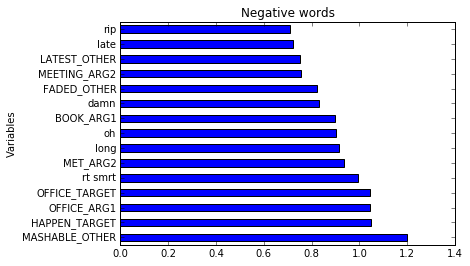

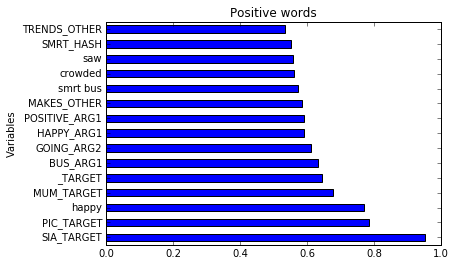

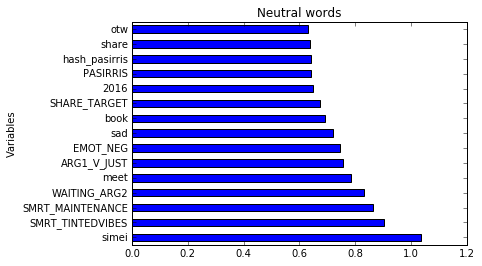

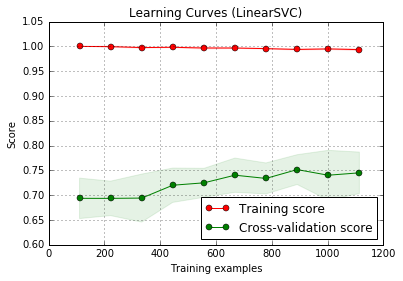

Accuracy on the training data :  0.99435483871
Accuracy on the testing data :  0.73607748184 

Training data Crosstab: 
 col_0       -1    0    1
Sentiment               
-1         414    4    0
 0           2  719    0
 1           0    1  100
Testing data Crosstab: 
 col_0       -1    0   1
Sentiment              
-1         188   82  12
 0          67  398  14
 1          18   25  22 

             precision    recall  f1-score   support

         -1       0.69      0.67      0.68       282
          0       0.79      0.83      0.81       479
          1       0.46      0.34      0.39        65

avg / total       0.73      0.74      0.73       826

FI-Score:  0.731043732445


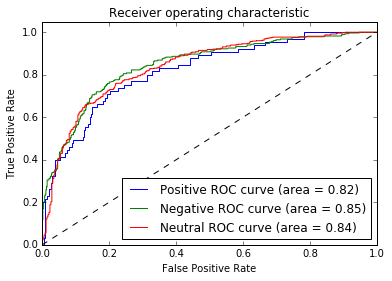

In [74]:
import warnings
warnings.filterwarnings('ignore')
classifier,target_training,target_testing,predictions_training,predictions_testing,training_set,testing_set= Classify(data, 0.7)

# Target Independent

Training set size :  1446
Testing set size :  620 

Number of features used in training:  2381
Cross validation scores :  [ 0.62791047  0.64990372  0.6638413   0.67501108  0.70964955  0.71367293
  0.71784432  0.73032144  0.72747634  0.73505349]
Cross validation scores :  0.695068463926


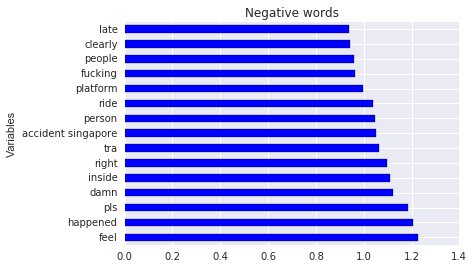

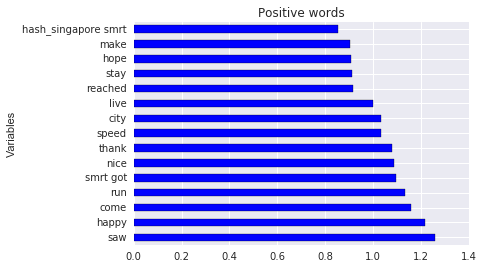

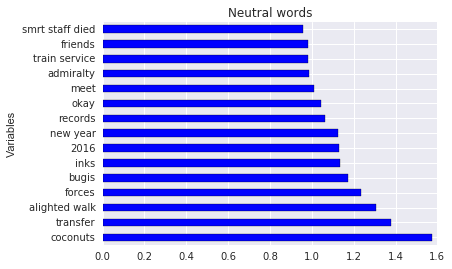

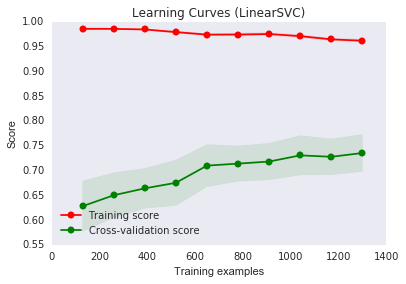

Accuracy on the training data :  0.958506224066
Accuracy on the testing data :  0.709677419355 

Training data Crosstab: 
 col_0       -1    0    1
Sentiment               
-1         459   25    0
 0          20  825    0
 1           5   10  102
Testing data Crosstab: 
 col_0       -1    0   1
Sentiment              
-1         143   60  13
 0          56  283  16
 1          16   19  14 

             precision    recall  f1-score   support

         -1       0.67      0.66      0.66       216
          0       0.78      0.80      0.79       355
          1       0.33      0.29      0.30        49

avg / total       0.71      0.71      0.71       620

FI-Score:  0.707228917814


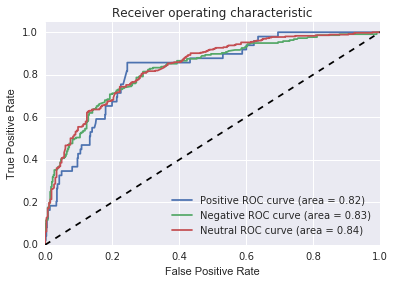

In [201]:
# BOW
data = dfBow.copy()
data = data.join(newdf['Sentiment_2'])
data.columns = data.columns.str.replace('Sentiment_2','Sentiment')
warnings.filterwarnings('ignore')
classifier,target_training,target_testing,predictions_training,predictions_testing,training_set,testing_set= Classify(data, 0.7)

Training set size :  1446
Testing set size :  620 

Number of features used in training:  2383
Cross validation scores :  [ 0.62096549  0.65139346  0.67915334  0.69709613  0.71995213  0.72131707
  0.7261114   0.73373645  0.7268107   0.73440708]
Cross validation scores :  0.70109432494


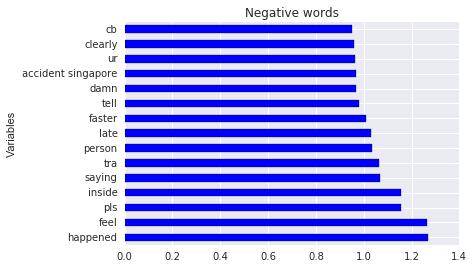

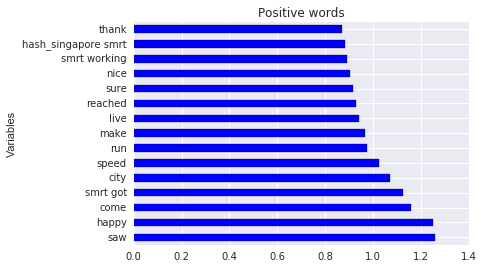

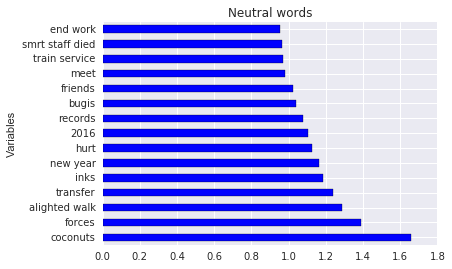

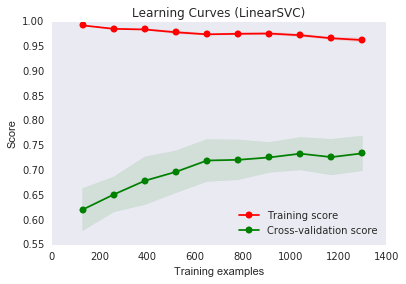

Accuracy on the training data :  0.957123098202
Accuracy on the testing data :  0.724193548387 

Training data Crosstab: 
 col_0       -1    0    1
Sentiment               
-1         446   38    0
 0          11  834    0
 1           3   10  104
Testing data Crosstab: 
 col_0       -1    0   1
Sentiment              
-1         147   58  11
 0          52  287  16
 1          15   19  15 

             precision    recall  f1-score   support

         -1       0.69      0.68      0.68       216
          0       0.79      0.81      0.80       355
          1       0.36      0.31      0.33        49

avg / total       0.72      0.72      0.72       620

FI-Score:  0.72136302825


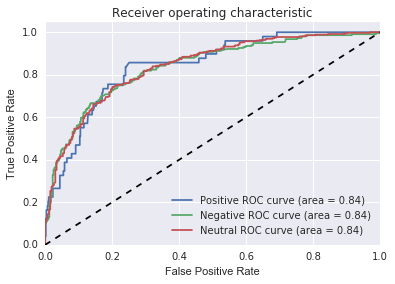

In [206]:
# HL lex
data = dfBow.copy()
data = data.join(newdf['POSITVE_LEX'])
data = data.join(newdf['NEGATIVE_LEX'])
data = data.join(newdf['Sentiment_2'])
data.columns = data.columns.str.replace('Sentiment_2','Sentiment')
warnings.filterwarnings('ignore')
classifier,target_training,target_testing,predictions_training,predictions_testing,training_set,testing_set= Classify(data, 0.7)

Training set size :  1446
Testing set size :  620 

Number of features used in training:  2388
Cross validation scores :  [ 0.61751243  0.66041737  0.69573532  0.70406985  0.72413317  0.7198755
  0.72620686  0.73375541  0.73575279  0.73712765]
Cross validation scores :  0.705458634251


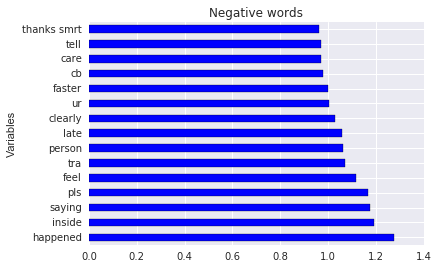

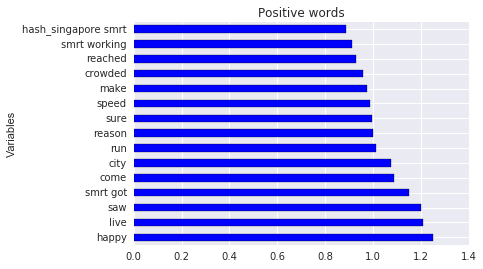

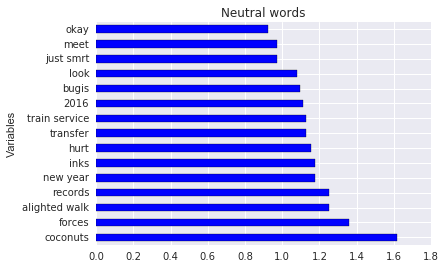

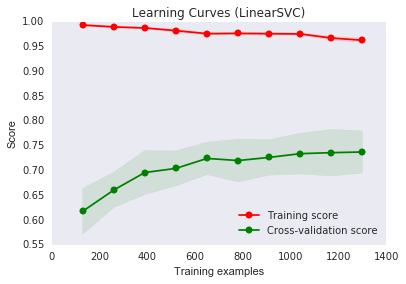

Accuracy on the training data :  0.957123098202
Accuracy on the testing data :  0.733870967742 

Training data Crosstab: 
 col_0       -1    0    1
Sentiment               
-1         452   32    0
 0          15  830    0
 1           4   11  102
Testing data Crosstab: 
 col_0       -1    0   1
Sentiment              
-1         153   54   9
 0          51  288  16
 1          17   18  14 

             precision    recall  f1-score   support

         -1       0.69      0.71      0.70       216
          0       0.80      0.81      0.81       355
          1       0.36      0.29      0.32        49

avg / total       0.73      0.73      0.73       620

FI-Score:  0.730365082249


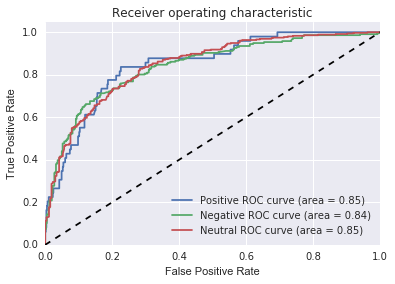

In [207]:
# MPQA LEx
data = dfBow.join(dfSubj)
data = data.join(newdf['POSITVE_LEX'])
data = data.join(newdf['NEGATIVE_LEX'])
data = data.join(newdf['Sentiment_2'])
data.columns = data.columns.str.replace('Sentiment_2','Sentiment')
warnings.filterwarnings('ignore')
classifier,target_training,target_testing,predictions_training,predictions_testing,training_set,testing_set= Classify(data, 0.7)

Training set size :  1446
Testing set size :  620 

Number of features used in training:  2390
Cross validation scores :  [ 0.64450656  0.66602595  0.68881443  0.71165146  0.73513026  0.73093486
  0.73858339  0.7503513   0.75099319  0.75305783]
Cross validation scores :  0.717004920898


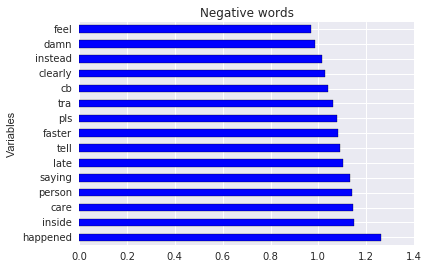

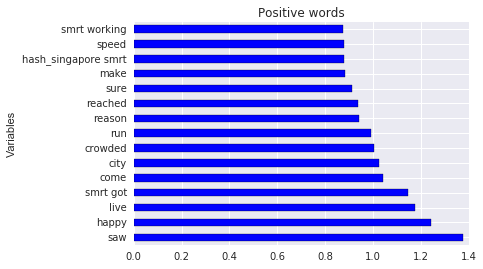

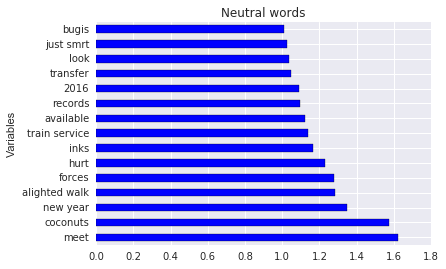

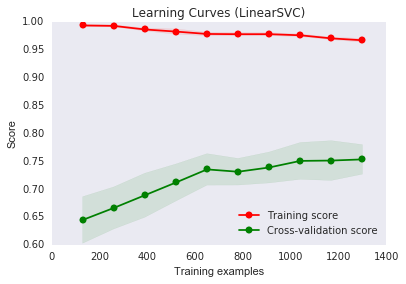

Accuracy on the training data :  0.960580912863
Accuracy on the testing data :  0.733870967742 

Training data Crosstab: 
 col_0       -1    0    1
Sentiment               
-1         456   28    0
 0          16  829    0
 1           3   10  104
Testing data Crosstab: 
 col_0       -1    0   1
Sentiment              
-1         151   55  10
 0          55  289  11
 1          16   18  15 

             precision    recall  f1-score   support

         -1       0.68      0.70      0.69       216
          0       0.80      0.81      0.81       355
          1       0.42      0.31      0.35        49

avg / total       0.73      0.73      0.73       620

FI-Score:  0.729684106636


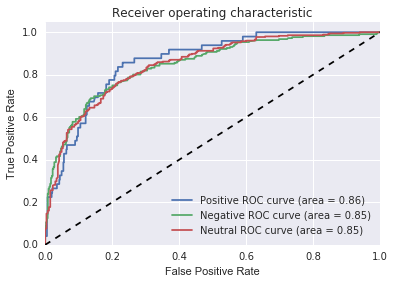

In [208]:
# Punctuations
data = dfBow.join(dfSubj)
data = data.join(newdf['POSITVE_LEX'])
data = data.join(newdf['NEGATIVE_LEX'])
data = data.join(newdf['PUNC_QUES'])
data = data.join(newdf['PUNC_EXCL'])
data = data.join(newdf['Sentiment_2'])
data.columns = data.columns.str.replace('Sentiment_2','Sentiment')
warnings.filterwarnings('ignore')
classifier,target_training,target_testing,predictions_training,predictions_testing,training_set,testing_set= Classify(data, 0.7)

Training set size :  1446
Testing set size :  620 

Number of features used in training:  2395
Cross validation scores :  [ 0.64585719  0.6638272   0.69084527  0.71436698  0.73238575  0.73710882
  0.73580069  0.74617465  0.74199348  0.75163062]
Cross validation scores :  0.715999064259


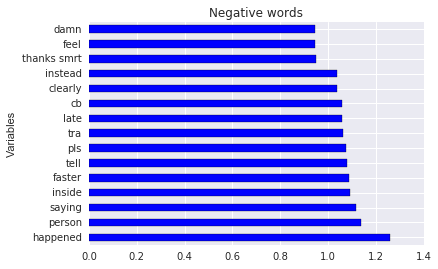

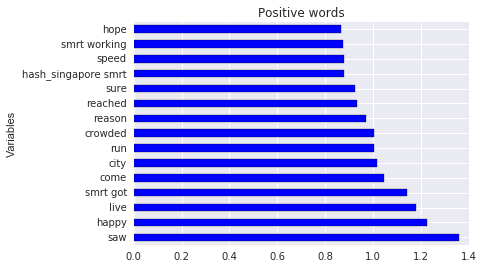

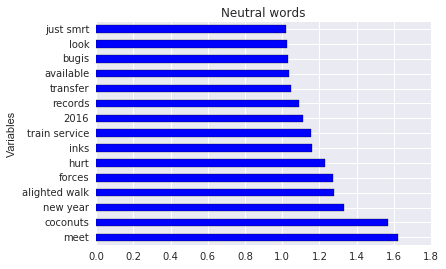

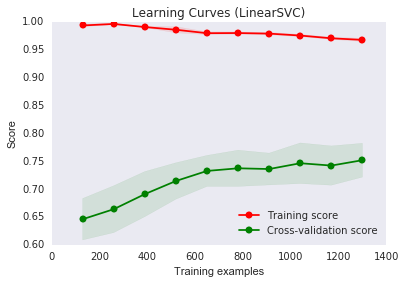

Accuracy on the training data :  0.961272475795
Accuracy on the testing data :  0.735483870968 

Training data Crosstab: 
 col_0       -1    0    1
Sentiment               
-1         455   29    0
 0          15  830    0
 1           2   10  105
Testing data Crosstab: 
 col_0       -1    0   1
Sentiment              
-1         151   53  12
 0          54  291  10
 1          17   18  14 

             precision    recall  f1-score   support

         -1       0.68      0.70      0.69       216
          0       0.80      0.82      0.81       355
          1       0.39      0.29      0.33        49

avg / total       0.73      0.74      0.73       620

FI-Score:  0.731018837316


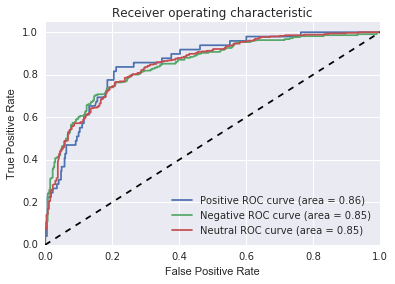

In [209]:
# Emoticons and Emojis
data = dfBow.join(dfSubj)
data = data.join(newdf['POSITVE_LEX'])
data = data.join(newdf['NEGATIVE_LEX'])
data = data.join(newdf['PUNC_QUES'])
data = data.join(newdf['PUNC_EXCL'])
data = data.join(newdf['EMOT_POS'])
data = data.join(newdf['EMOT_NEG'])
data = data.join(newdf['POS_EMO'])
data = data.join(newdf['NEG_EMO'])
data = data.join(newdf['NEUTRAL_EMO'])
data = data.join(newdf['Sentiment_2'])
data.columns = data.columns.str.replace('Sentiment_2','Sentiment')
warnings.filterwarnings('ignore')
classifier,target_training,target_testing,predictions_training,predictions_testing,training_set,testing_set= Classify(data, 0.7)

Training set size :  1446
Testing set size :  620 

Number of features used in training:  2396
Cross validation scores :  [ 0.67849362  0.6915302   0.70544391  0.71993284  0.75103164  0.74747307
  0.74198437  0.74412977  0.74887167  0.75436536]
Cross validation scores :  0.728325643613


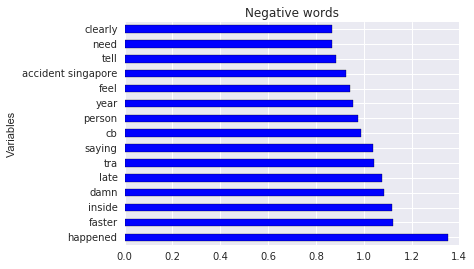

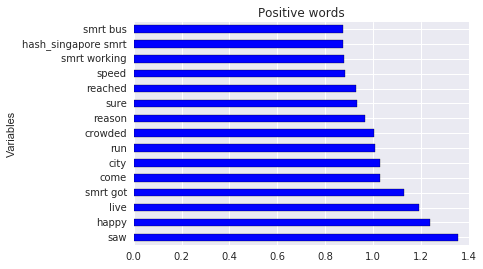

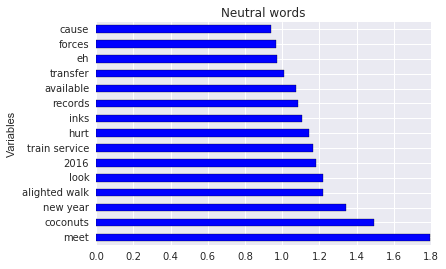

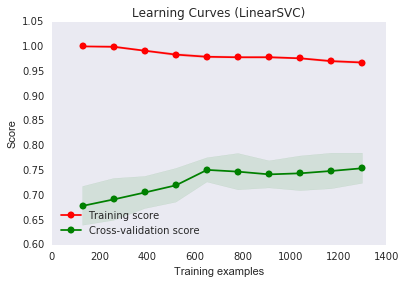

Accuracy on the training data :  0.96265560166
Accuracy on the testing data :  0.727419354839 

Training data Crosstab: 
 col_0       -1    0    1
Sentiment               
-1         458   26    0
 0          14  831    0
 1           4   10  103
Testing data Crosstab: 
 col_0       -1    0   1
Sentiment              
-1         146   58  12
 0          55  289  11
 1          15   18  16 

             precision    recall  f1-score   support

         -1       0.68      0.68      0.68       216
          0       0.79      0.81      0.80       355
          1       0.41      0.33      0.36        49

avg / total       0.72      0.73      0.72       620

FI-Score:  0.723877891821


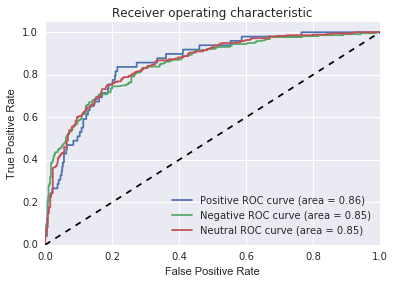

In [210]:
# URL
data = dfBow.join(dfSubj)
data = data.join(newdf['POSITVE_LEX'])
data = data.join(newdf['NEGATIVE_LEX'])
data = data.join(newdf['PUNC_QUES'])
data = data.join(newdf['PUNC_EXCL'])
data = data.join(newdf['EMOT_POS'])
data = data.join(newdf['EMOT_NEG'])
data = data.join(newdf['POS_EMO'])
data = data.join(newdf['NEG_EMO'])
data = data.join(newdf['NEUTRAL_EMO'])
data = data.join(newdf['URL_Flag'])
data = data.join(newdf['Sentiment_2'])
data.columns = data.columns.str.replace('Sentiment_2','Sentiment')
warnings.filterwarnings('ignore')
classifier,target_training,target_testing,predictions_training,predictions_testing,training_set,testing_set= Classify(data, 0.7)

Training set size :  1446
Testing set size :  620 

Number of features used in training:  2428
Cross validation scores :  [ 0.68330218  0.68039441  0.70726015  0.70453432  0.72469896  0.73979107
  0.74606043  0.74814363  0.75582636  0.75572591]
Cross validation scores :  0.724573741393


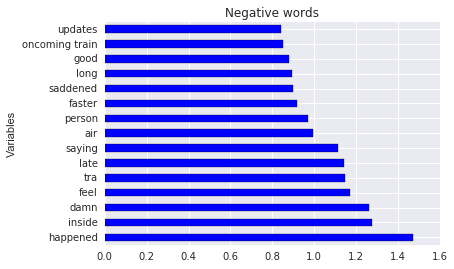

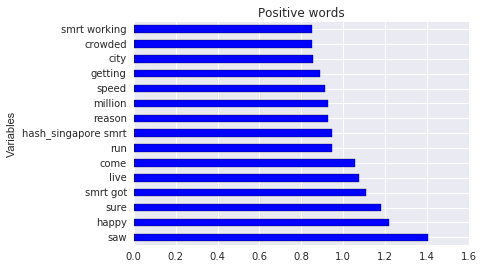

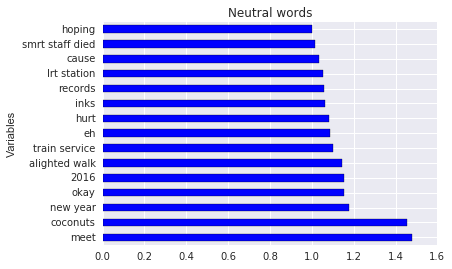

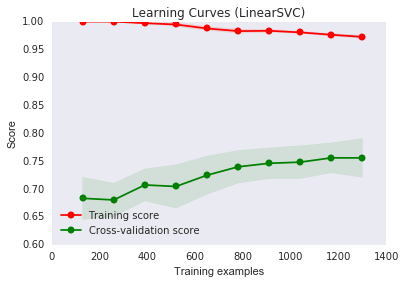

Accuracy on the training data :  0.968188105118
Accuracy on the testing data :  0.732258064516 

Training data Crosstab: 
 col_0       -1    0    1
Sentiment               
-1         459   25    0
 0           9  834    2
 1           3    7  107
Testing data Crosstab: 
 col_0       -1    0   1
Sentiment              
-1         146   60  10
 0          48  291  16
 1          10   22  17 

             precision    recall  f1-score   support

         -1       0.72      0.68      0.70       216
          0       0.78      0.82      0.80       355
          1       0.40      0.35      0.37        49

avg / total       0.73      0.73      0.73       620

FI-Score:  0.729169466578


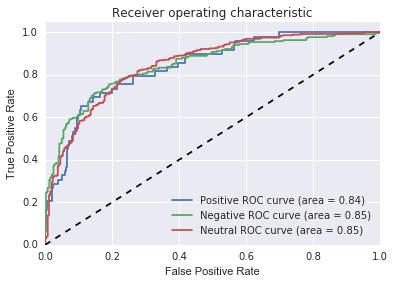

In [211]:
# POS
data = dfBow.join(dfSubj).join(dfPOS)
data = data.join(newdf['POSITVE_LEX'])
data = data.join(newdf['NEGATIVE_LEX'])
data = data.join(newdf['PUNC_QUES'])
data = data.join(newdf['PUNC_EXCL'])
data = data.join(newdf['EMOT_POS'])
data = data.join(newdf['EMOT_NEG'])
data = data.join(newdf['POS_EMO'])
data = data.join(newdf['NEG_EMO'])
data = data.join(newdf['NEUTRAL_EMO'])w
data = data.join(newdf['URL_Flag'])
data = data.join(newdf['Sentiment_2'])
data.columns = data.columns.str.replace('Sentiment_2','Sentiment')
warnings.filterwarnings('ignore')
classifier,target_training,target_testing,predictions_training,predictions_testing,training_set,testing_set= Classify(data, 0.7)

Training set size :  1446
Testing set size :  620 

Number of features used in training:  41
Cross validation scores :  [ 0.66055648  0.67487751  0.70325068  0.70460631  0.71570385  0.72048866
  0.72535509  0.7219303   0.72534072  0.7246029 ]
Cross validation scores :  0.707671249944


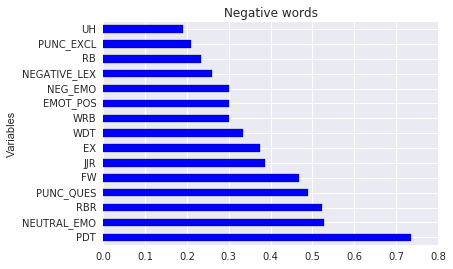

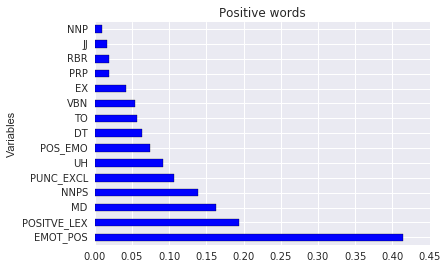

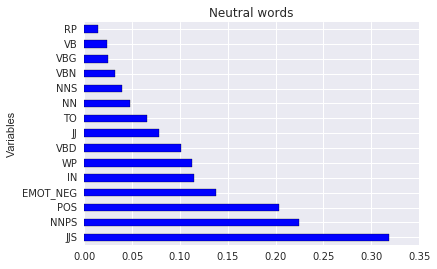

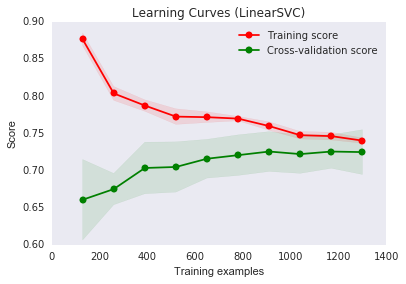

Accuracy on the training data :  0.73928077455
Accuracy on the testing data :  0.698387096774 

Training data Crosstab: 
 col_0       -1    0   1
Sentiment              
-1         281  203   0
 0          57  785   3
 1          38   76   3
Testing data Crosstab: 
 col_0       -1    0   1
Sentiment              
-1         104  111   1
 0          29  326   0
 1          11   35   3 

             precision    recall  f1-score   support

         -1       0.72      0.48      0.58       216
          0       0.69      0.92      0.79       355
          1       0.75      0.06      0.11        49

avg / total       0.71      0.70      0.66       620

FI-Score:  0.661655243269


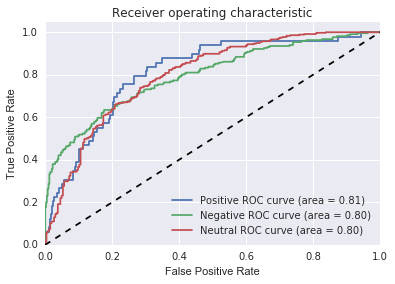

In [217]:
# POS
data = dfPOS.copy()
data = data.join(newdf['POSITVE_LEX'])
data = data.join(newdf['NEGATIVE_LEX'])
data = data.join(newdf['PUNC_QUES'])
data = data.join(newdf['PUNC_EXCL'])
data = data.join(newdf['EMOT_POS'])
data = data.join(newdf['EMOT_NEG'])
data = data.join(newdf['POS_EMO'])
data = data.join(newdf['NEG_EMO'])
data = data.join(newdf['NEUTRAL_EMO'])
data = data.join(newdf['Sentiment_2'])
data.columns = data.columns.str.replace('Sentiment_2','Sentiment')
warnings.filterwarnings('ignore')
classifier,target_training,target_testing,predictions_training,predictions_testing,training_set,testing_set= Classify(data, 0.7)

Training set size :  1446
Testing set size :  620 

Number of features used in training:  2622
Cross validation scores :  [ 0.68266521  0.67827749  0.70658014  0.70175655  0.72263465  0.74256911
  0.74953764  0.74472383  0.75168344  0.75297647]
Cross validation scores :  0.723340452323


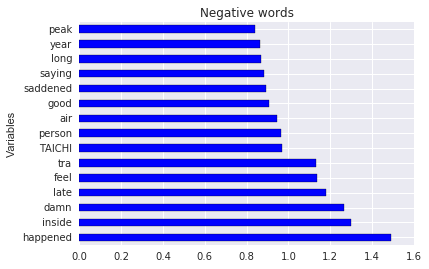

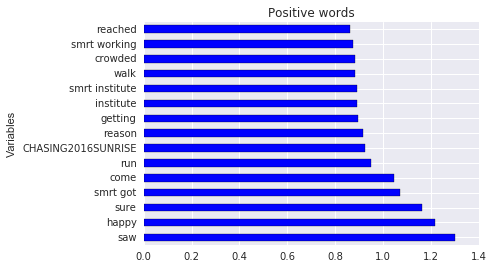

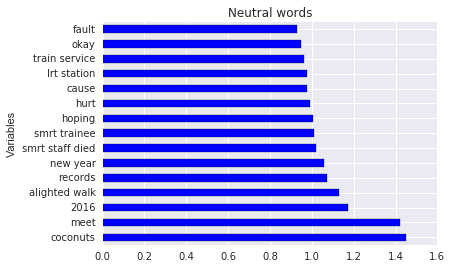

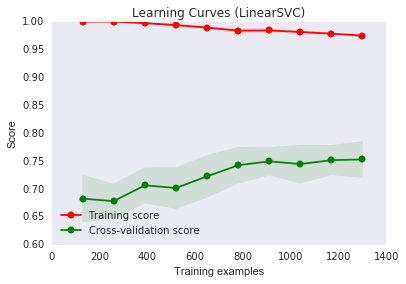

Accuracy on the training data :  0.970262793914
Accuracy on the testing data :  0.733870967742 

Training data Crosstab: 
 col_0       -1    0    1
Sentiment               
-1         462   22    0
 0           9  835    1
 1           5    6  106
Testing data Crosstab: 
 col_0       -1    0   1
Sentiment              
-1         148   60   8
 0          51  290  14
 1          12   20  17 

             precision    recall  f1-score   support

         -1       0.70      0.69      0.69       216
          0       0.78      0.82      0.80       355
          1       0.44      0.35      0.39        49

avg / total       0.73      0.73      0.73       620

FI-Score:  0.73010457945


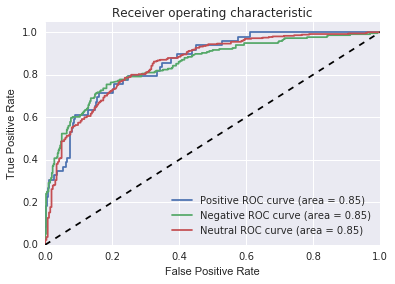

In [218]:
# Hash Tags
data = dfBow.join(dfSubj).join(dfPOS).join(dfhash,lsuffix = 'TI')
data = data.join(newdf['POSITVE_LEX'])
data = data.join(newdf['NEGATIVE_LEX'])
data = data.join(newdf['PUNC_QUES'])
data = data.join(newdf['PUNC_EXCL'])
data = data.join(newdf['EMOT_POS'])
data = data.join(newdf['EMOT_NEG'])
data = data.join(newdf['POS_EMO'])
data = data.join(newdf['NEG_EMO'])
data = data.join(newdf['NEUTRAL_EMO'])
data = data.join(newdf['URL_Flag'])
data = data.join(newdf['Sentiment_2'])
data.columns = data.columns.str.replace('Sentiment_2','Sentiment')
warnings.filterwarnings('ignore')
classifier,target_training,target_testing,predictions_training,predictions_testing,training_set,testing_set= Classify(data, 0.7)

Training set size :  1446
Testing set size :  620 

Number of features used in training:  355
Cross validation scores :  [ 0.59679265  0.59955167  0.61063464  0.61818791  0.6230302   0.62029054
  0.62442394  0.62717777  0.62923729  0.62921341]
Cross validation scores :  0.617854002261


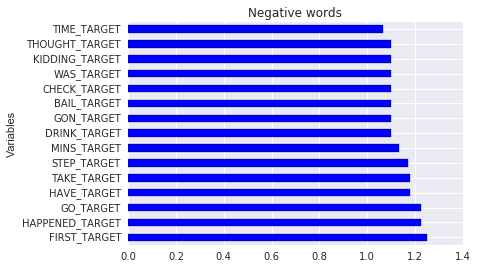

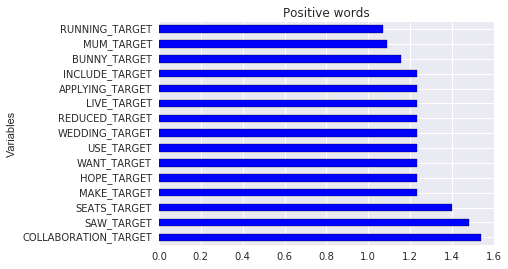

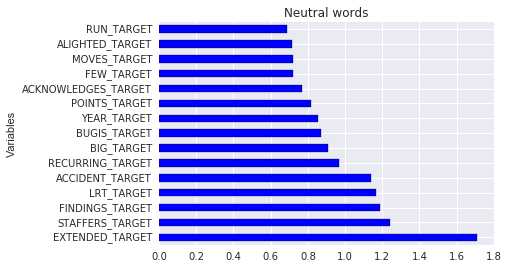

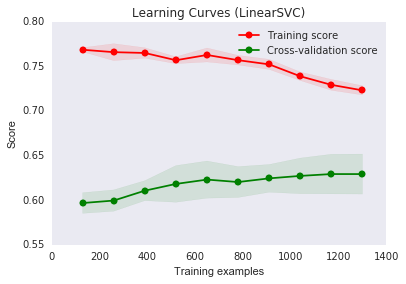

Accuracy on the training data :  0.721300138313
Accuracy on the testing data :  0.616129032258 

Training data Crosstab: 
 col_0       -1    0   1
Sentiment              
-1         180  304   0
 0          12  833   0
 1           5   82  30
Testing data Crosstab: 
 col_0      -1    0   1
Sentiment             
-1         45  170   1
 0         15  337   3
 1          3   46   0 

             precision    recall  f1-score   support

         -1       0.71      0.21      0.32       216
          0       0.61      0.95      0.74       355
          1       0.00      0.00      0.00        49

avg / total       0.60      0.62      0.54       620

FI-Score:  0.537404250345


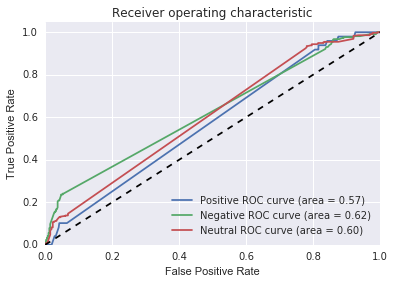

In [235]:
#
data = dep_feats5.copy()
data = data.join(newdf['Sentiment_2'])
data.columns = data.columns.str.replace('Sentiment_2','Sentiment')
warnings.filterwarnings('ignore')
classifier,target_training,target_testing,predictions_training,predictions_testing,training_set,testing_set= Classify(data, 0.7)

In [ ]:
data = dfTarg.join(dep_feats2)
data = data.join(newdf['Sentiment_2'])
data.columns = data.columns.str.replace('Sentiment_2','Sentiment')
warnings.filterwarnings('ignore')
classifier,target_training,target_testing,predictions_training,predictions_testing,training_set,testing_set= Classify(data, 0.7)

In [ ]:
data = dfTarg.join(dep_feats2).join(dep_feats3)
data = data.join(newdf['Sentiment_2'])
data.columns = data.columns.str.replace('Sentiment_2','Sentiment')
warnings.filterwarnings('ignore')
classifier,target_training,target_testing,predictions_training,predictions_testing,training_set,testing_set= Classify(data, 0.7)

In [ ]:
data = dfTarg.join(dep_feats2).join(dep_feats3).join(dep_feats4)
data = data.join(newdf['Sentiment_2'])
data.columns = data.columns.str.replace('Sentiment_2','Sentiment')
warnings.filterwarnings('ignore')
classifier,target_training,target_testing,predictions_training,predictions_testing,training_set,testing_set= Classify(data, 0.7)

In [ ]:
data = dfTarg.join(dep_feats2).join(dep_feats3).join(dep_feats4).join(dep_feats5)
data = data.join(newdf['Sentiment_2'])
data.columns = data.columns.str.replace('Sentiment_2','Sentiment')
warnings.filterwarnings('ignore')
classifier,target_training,target_testing,predictions_training,predictions_testing,training_set,testing_set= Classify(data, 0.7)

Training set size :  1446
Testing set size :  620 

Number of features used in training:  1582


<IPython.core.display.Javascript object>


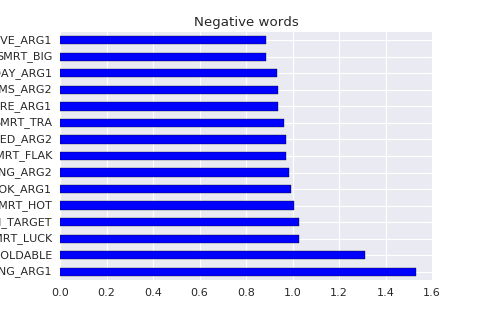

<IPython.core.display.Javascript object>


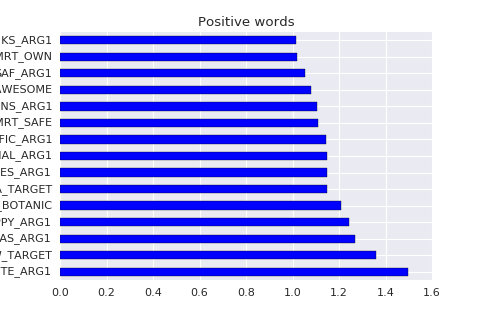

<IPython.core.display.Javascript object>


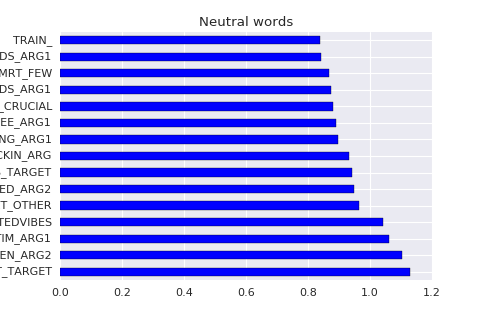

<IPython.core.display.Javascript object>


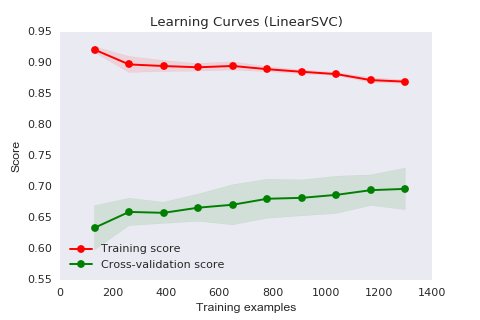

Cross validation scores :  [ 0.63421369  0.65981886  0.65833943  0.66664462  0.6713963   0.68106158
  0.68250795  0.68732622  0.69489845  0.69697719]
Cross validation scores :  0.673318429609
Accuracy on the training data :  0.86652835408
Accuracy on the testing data :  0.703225806452 

Training data Crosstab: 
 col_0       -1    0   1
Sentiment              
-1         353  131   0
 0          27  817   1
 1           5   29  83
Testing data Crosstab: 
 col_0       -1    0   1
Sentiment              
-1         104  105   7
 0          22  322  11
 1          16   23  10 

             precision    recall  f1-score   support

         -1       0.73      0.48      0.58       216
          0       0.72      0.91      0.80       355
          1       0.36      0.20      0.26        49

avg / total       0.69      0.70      0.68       620

FI-Score:  0.681007224889


<IPython.core.display.Javascript object>


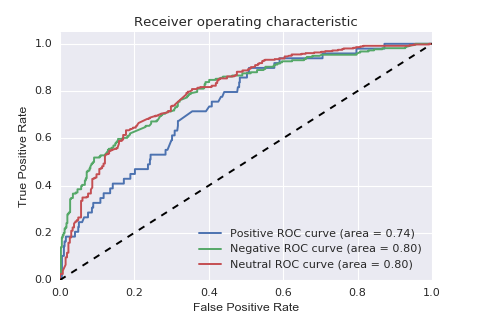

In [261]:
data = dfTarg.join(dep_feats2).join(dep_feats4).join(dep_feats5,lsuffix = 'TD').join(difDist,lsuffix = 'TID' )
data = data.join(newdf['Sentiment_2'])
data.columns = data.columns.str.replace('Sentiment_2','Sentiment')
warnings.filterwarnings('ignore')
classifier,target_training,target_testing,predictions_training,predictions_testing,training_set,testing_set= Classify(data, 0.7)

In [262]:
len(data.columnsumns)

1583

# Target dependent

In [229]:
len(dep_feats4.columns)

708

Training set size :  1446
Testing set size :  620 

Number of features used in training:  3330
Cross validation scores :  [ 0.67986335  0.68236319  0.70866327  0.71350024  0.73024035  0.74530857
  0.75089753  0.74748258  0.74816744  0.75569684]
Cross validation scores :  0.726218336393


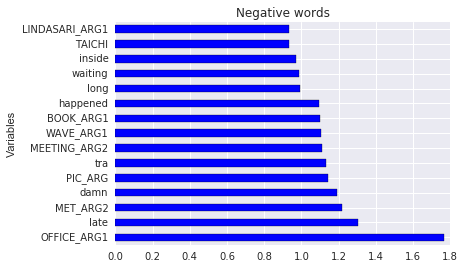

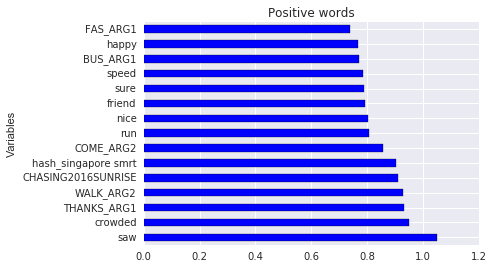

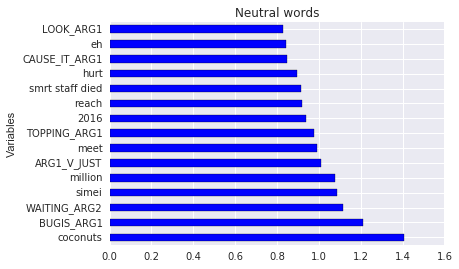

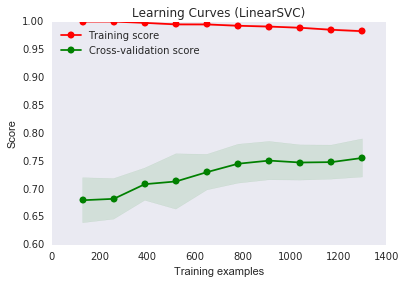

Accuracy on the training data :  0.980636237898
Accuracy on the testing data :  0.740322580645 

Training data Crosstab: 
 col_0       -1    0    1
Sentiment               
-1         471   13    0
 0           6  838    1
 1           3    5  109
Testing data Crosstab: 
 col_0       -1    0   1
Sentiment              
-1         149   61   6
 0          49  294  12
 1          14   19  16 

             precision    recall  f1-score   support

         -1       0.70      0.69      0.70       216
          0       0.79      0.83      0.81       355
          1       0.47      0.33      0.39        49

avg / total       0.73      0.74      0.73       620

FI-Score:  0.734873448692


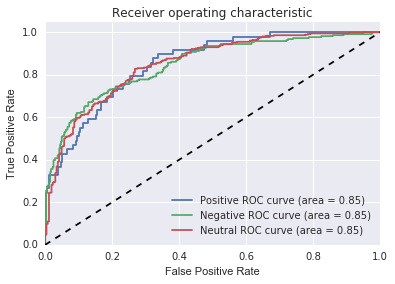

In [227]:

#Target dependent features (Jiang) 
data = dfBow.join(dfSubj).join(dfPOS).join(dfhash,lsuffix = 'TI').join(dep_feats4)
data = data.join(newdf['POSITVE_LEX'])
data = data.join(newdf['NEGATIVE_LEX'])
data = data.join(newdf['PUNC_QUES'])
data = data.join(newdf['PUNC_EXCL'])
data = data.join(newdf['EMOT_POS'])
data = data.join(newdf['EMOT_NEG'])
data = data.join(newdf['POS_EMO'])
data = data.join(newdf['NEG_EMO'])
data = data.join(newdf['NEUTRAL_EMO'])
data = data.join(newdf['URL_Flag'])
data = data.join(newdf['Sentiment_2'])
data.columns = data.columns.str.replace('Sentiment_2','Sentiment')
warnings.filterwarnings('ignore')
classifier,target_training,target_testing,predictions_training,predictions_testing,training_set,testing_set= Classify(data, 0.7)

Training set size :  1446
Testing set size :  620 

Number of features used in training:  3347
Cross validation scores :  [ 0.67571538  0.68240111  0.71080881  0.7163166   0.73442178  0.74193168
  0.7426067   0.74882836  0.75091662  0.75091176]
Cross validation scores :  0.725485879974


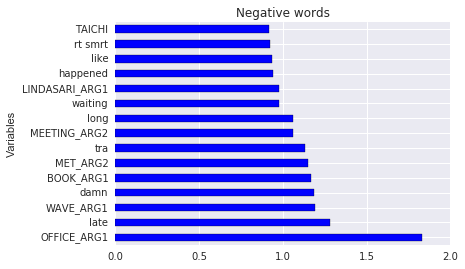

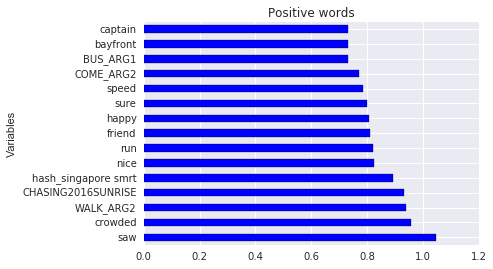

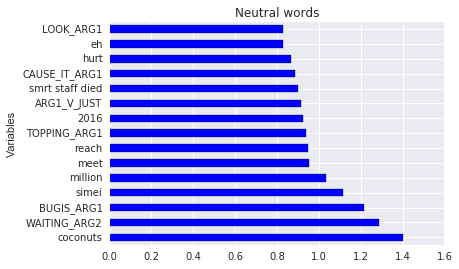

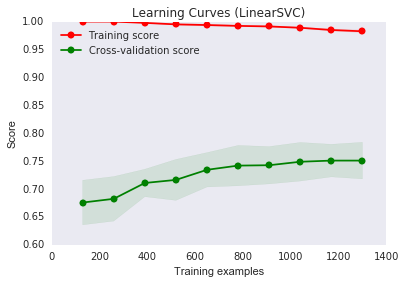

Accuracy on the training data :  0.979944674965
Accuracy on the testing data :  0.745161290323 

Training data Crosstab: 
 col_0       -1    0    1
Sentiment               
-1         470   14    0
 0           6  838    1
 1           3    5  109
Testing data Crosstab: 
 col_0       -1    0   1
Sentiment              
-1         152   58   6
 0          51  293  11
 1          13   19  17 

             precision    recall  f1-score   support

         -1       0.70      0.70      0.70       216
          0       0.79      0.83      0.81       355
          1       0.50      0.35      0.41        49

avg / total       0.74      0.75      0.74       620

FI-Score:  0.740339064824


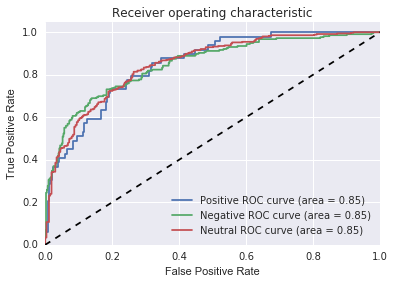

In [220]:

#Target dependent features (Jiang) + polarity (Lexicon)
data = dfBow.join(dfSubj).join(dfPOS).join(dfhash,lsuffix = 'TD').join(dep_feats4).join(dep_feats2)
data = data.join(newdf['POSITVE_LEX'])
data = data.join(newdf['NEGATIVE_LEX'])
data = data.join(newdf['PUNC_QUES'])
data = data.join(newdf['PUNC_EXCL'])
data = data.join(newdf['EMOT_POS'])
data = data.join(newdf['EMOT_NEG'])
data = data.join(newdf['POS_EMO'])
data = data.join(newdf['NEG_EMO'])
data = data.join(newdf['NEUTRAL_EMO'])
data = data.join(newdf['URL_Flag'])
data = data.join(newdf['Sentiment_2'])
data.columns = data.columns.str.replace('Sentiment_2','Sentiment')
warnings.filterwarnings('ignore')
classifier,target_training,target_testing,predictions_training,predictions_testing,training_set,testing_set= Classify(data, 0.7)

Training set size :  1446
Testing set size :  620 

Number of features used in training:  3846
Cross validation scores :  [ 0.67220943  0.68104588  0.71282049  0.72118775  0.74410143  0.74875718
  0.753599    0.75436037  0.7461227   0.74328718]
Cross validation scores :  0.727749140693


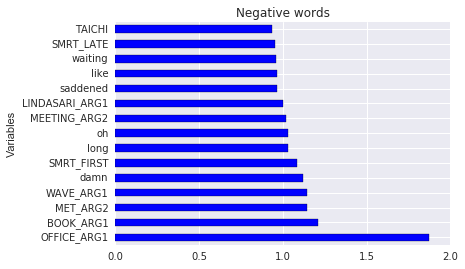

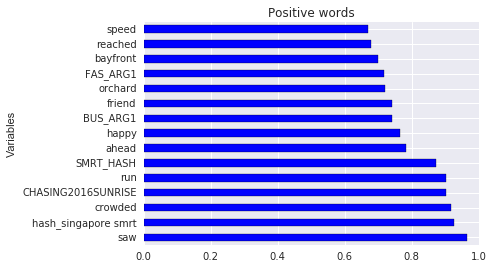

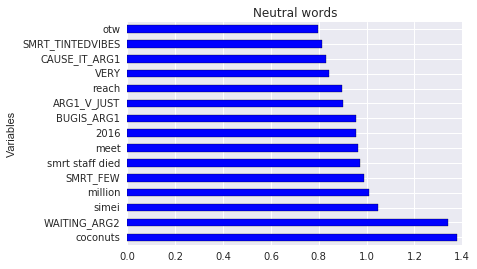

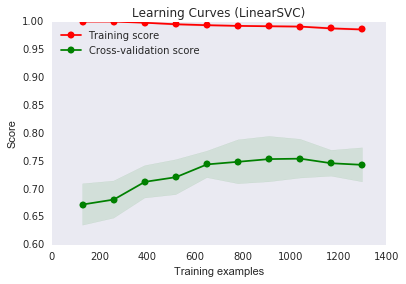

Accuracy on the training data :  0.984785615491
Accuracy on the testing data :  0.738709677419 

Training data Crosstab: 
 col_0       -1    0    1
Sentiment               
-1         471   13    0
 0           4  841    0
 1           2    3  112
Testing data Crosstab: 
 col_0       -1    0   1
Sentiment              
-1         150   60   6
 0          53  292  10
 1          12   21  16 

             precision    recall  f1-score   support

         -1       0.70      0.69      0.70       216
          0       0.78      0.82      0.80       355
          1       0.50      0.33      0.40        49

avg / total       0.73      0.74      0.73       620

FI-Score:  0.7330423747


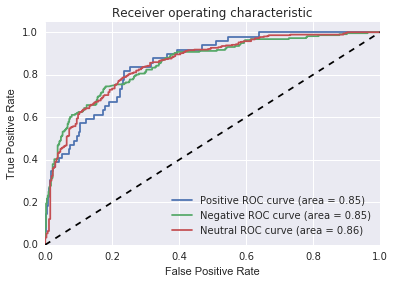

In [221]:
# adjectives with target
data = dfBow.join(dfSubj).join(dfPOS).join(dfhash,lsuffix = 'TD').join(dfTarg).join(dep_feats4).join(dep_feats2)
data = data.join(newdf['POSITVE_LEX'])
data = data.join(newdf['NEGATIVE_LEX'])
data = data.join(newdf['PUNC_QUES'])
data = data.join(newdf['PUNC_EXCL'])
data = data.join(newdf['EMOT_POS'])
data = data.join(newdf['EMOT_NEG'])
data = data.join(newdf['POS_EMO'])
data = data.join(newdf['NEG_EMO'])
data = data.join(newdf['NEUTRAL_EMO'])
data = data.join(newdf['URL_Flag'])
data = data.join(newdf['Sentiment_2'])
data.columns = data.columns.str.replace('Sentiment_2','Sentiment')
warnings.filterwarnings('ignore')
classifier,target_training,target_testing,predictions_training,predictions_testing,training_set,testing_set= Classify(data, 0.7)

Training set size :  1446
Testing set size :  620 

Number of features used in training:  3849
Cross validation scores :  [ 0.69012775  0.67340167  0.71344821  0.72467455  0.74554773  0.75231542
  0.74602185  0.75374243  0.74195583  0.74330154]
Cross validation scores :  0.728453696745


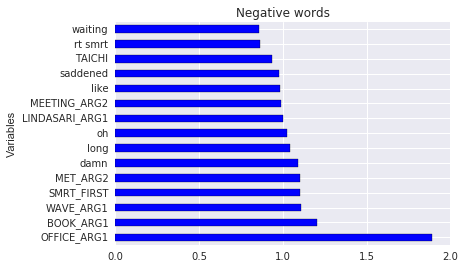

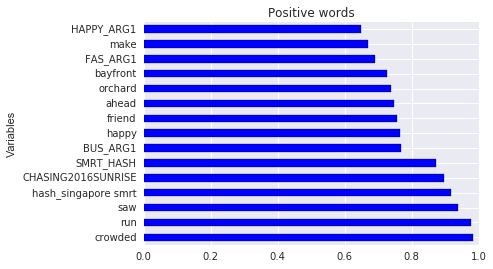

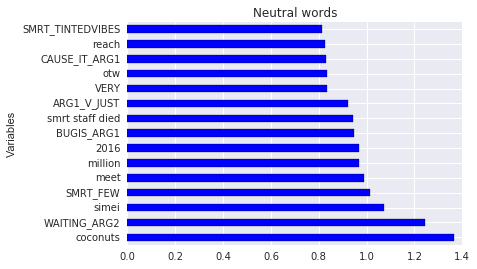

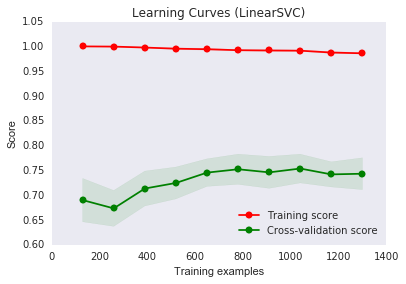

Accuracy on the training data :  0.985477178423
Accuracy on the testing data :  0.741935483871 

Training data Crosstab: 
 col_0       -1    0    1
Sentiment               
-1         472   12    0
 0           4  841    0
 1           2    3  112
Testing data Crosstab: 
 col_0       -1    0   1
Sentiment              
-1         146   62   8
 0          49  296  10
 1          12   19  18 

             precision    recall  f1-score   support

         -1       0.71      0.68      0.69       216
          0       0.79      0.83      0.81       355
          1       0.50      0.37      0.42        49

avg / total       0.73      0.74      0.74       620

FI-Score:  0.737037337567


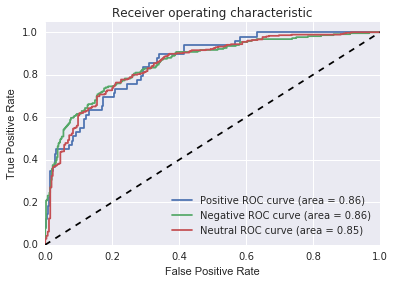

In [226]:
#Dif Distances
data = dfBow.join(dfSubj).join(dfPOS).join(dfhash,lsuffix = 'TD').join(dfTarg).join(dep_feats4).join(dep_feats2).join(difDist)
data = data.join(newdf['POSITVE_LEX'])
data = data.join(newdf['NEGATIVE_LEX'])
data = data.join(newdf['PUNC_QUES'])
data = data.join(newdf['PUNC_EXCL'])
data = data.join(newdf['EMOT_POS'])
data = data.join(newdf['EMOT_NEG'])
data = data.join(newdf['POS_EMO'])
data = data.join(newdf['NEG_EMO'])
data = data.join(newdf['NEUTRAL_EMO'])
data = data.join(newdf['URL_Flag'])
data = data.join(newdf['Sentiment_2'])
data.columns = data.columns.str.replace('Sentiment_2','Sentiment')
warnings.filterwarnings('ignore')
classifier,target_training,target_testing,predictions_training,predictions_testing,training_set,testing_set= Classify(data, 0.7)


# Do not use this.. use the next one

In [239]:
newdf.Sentiment_2.value_counts()

 0    1200
-1     700
 1     166
Name: Sentiment_2, dtype: int64

Training set size :  1446
Testing set size :  620 

Number of features used in training:  4204
Cross validation scores :  [ 0.68668386  0.67541802  0.71488487  0.72672455  0.7482202   0.74465671
  0.75229586  0.75025544  0.74125134  0.74675946]
Cross validation scores :  0.728715030515


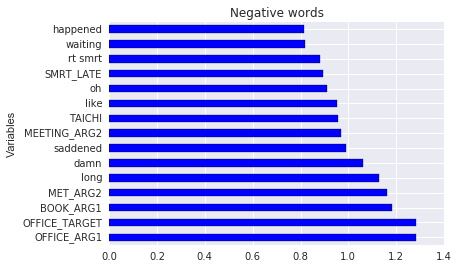

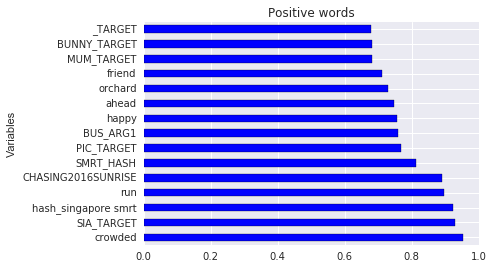

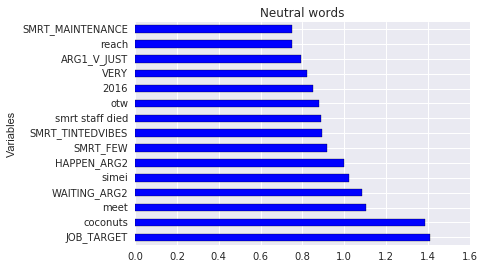

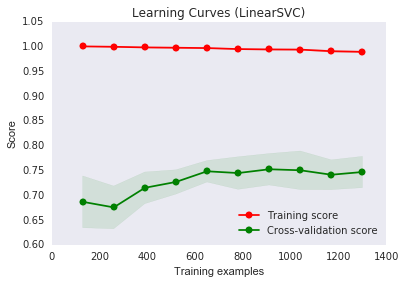

Accuracy on the training data :  0.988243430152
Accuracy on the testing data :  0.753225806452 

Training data Crosstab: 
 col_0       -1    0    1
Sentiment               
-1         474   10    0
 0           4  841    0
 1           1    2  114
Testing data Crosstab: 
 col_0       -1    0   1
Sentiment              
-1         150   61   5
 0          46  299  10
 1          14   17  18 

             precision    recall  f1-score   support

         -1       0.71      0.69      0.70       216
          0       0.79      0.84      0.82       355
          1       0.55      0.37      0.44        49

avg / total       0.75      0.75      0.75       620

FI-Score:  0.747804084485


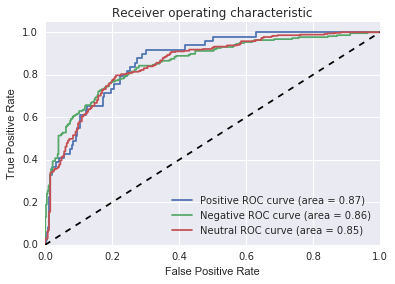

In [236]:
# Extra target dependecies2
# use either this or the one above
# This one has only the one directed towards target

data = dfBow.join(dfSubj).join(dfPOS).join(dfhash,lsuffix = 'TD').join(dfTarg).join(dep_feats4).join(dep_feats2).join(difDist).join(dep_feats5,lsuffix = 'TD')
data = data.join(newdf['POSITVE_LEX'])
data = data.join(newdf['NEGATIVE_LEX'])
data = data.join(newdf['PUNC_QUES'])
data = data.join(newdf['PUNC_EXCL'])
data = data.join(newdf['EMOT_POS'])
data = data.join(newdf['EMOT_NEG'])
data = data.join(newdf['POS_EMO'])
data = data.join(newdf['NEG_EMO'])
data = data.join(newdf['NEUTRAL_EMO'])
data = data.join(newdf['URL_Flag'])
data = data.join(newdf['Sentiment_2'])
data.columns = data.columns.str.replace('Sentiment_2','Sentiment')
warnings.filterwarnings('ignore')
classifier,target_training,target_testing,predictions_training,predictions_testing,training_set,testing_set= Classify(data, 0.7)

In [254]:
vs = pd.read_csv('/Users/gautamborgohain/Desktop/vader.csv')
vs = vs.sample(n = 2066)
vs.head()

,Unnamed: 0,Preds,True
701,701,0,0
1892,1892,0,-1
2032,2032,0,-1
1913,1913,0,-1
556,556,0,0


In [258]:
accuracy_score(vs['True'], vs.Preds)
f1_score(vs['True'], vs.Preds, labels = [1,-1])

0.052265800772176907

In [256]:
pd.crosstab(vs['True'], vs.Preds)

Preds,-1,0,1
True,,,
-1,19,672,9
0,17,1181,2
1,0,161,5


In [233]:
import pandas as pd
tweets = []
tweets.append("2 SMRT staff dead at accident near Pasir Ris station")
tweets.append("why does SMRT train break down")
tweets.append("SMRT train broke down") # This is to test nsubj
tweets.append("SMRT staff stopped")# This is to test nsubj
tweets.append("Train accident in Singapore kills 2 maintenance staff")
tweets.append("SMRT trainee killed in accident had planned to go to Kuala Lumpur with his friends this week")
tweets.append("Some SMRT staff upset over apparent disregard for workers safety")
tweets.append("SMRT fatal accident: We must do our best to prevent repeat, says PM Lee")
tweets.append('Safety protocols under review after 2 staff hit by oncoming train ')
tweets.append('On Facebook, condolences pour forth for 2 SMRT staff killed in accident')
tweets.append('I would like to say GREAT JOB to SMRT quite amazed to say the flow of crowd control for everyone to get home is smooth.')
df = pd.DataFrame(tweets, columns=['Tweet'])
df

,Tweet
0,2 SMRT staff dead at accident near Pasir Ris s...
1,why does SMRT train break down
2,SMRT train broke down
3,SMRT staff stopped
4,Train accident in Singapore kills 2 maintenanc...
5,SMRT trainee killed in accident had planned to...
6,Some SMRT staff upset over apparent disregard ...
7,SMRT fatal accident: We must do our best to pr...
8,Safety protocols under review after 2 staff hi...
9,"On Facebook, condolences pour forth for 2 SMRT..."


In [234]:
soaTypeDependency2(df)

Completed Type Dependency Analysis2b


,HIT_TARGET,JOB_TARGET,NEGATIVE_TARGET,POSITIVE_TARGET
0,0,0,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,0,0
4,0,0,0,0
5,0,0,0,0
6,0,0,0,0
7,0,0,0,0
8,1,0,0,0
9,0,0,0,0


## Recursive feature elimination with CV for seeing the impact of features on the performance

Optimal number of features : 1513


<IPython.core.display.Javascript object>


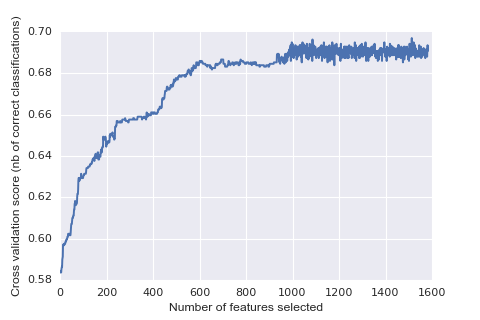

In [263]:
#Recursive feature extractionwith cross validation

import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.cross_validation import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Build a classification task using 3 informative features

y = target_training.as_matrix(columns=None)
X = training_set.as_matrix(columns=None)

# Create the RFE object and compute a cross-validated score.
svc = LinearSVC()
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(y, 5),
              scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [ ]:
pd

In [69]:
cols = pd.DataFrame()
cols['Features'] = training_set.columns
cols['Score'] = rfecv.grid_scores_
cols.sort(ascending=False).head(20)

,Features,Score
606,º_ARG,0.622129
605,YEAR_ARG1,0.622129
604,WORS_ARG1,0.622129
603,WORKER_ARG1,0.622129
602,WORD_ARG,0.622129
601,WISH_IT_ARG1,0.622129
600,WHATSAPP_ARG1,0.622129
599,WHAMMI_ARG1,0.622129
598,WERE_IT_ARG1,0.622129
597,WEE_ARG1,0.622129
